**Airbnb project**<br>
Author: Patryk Franaszczuk<br>
City: Florence, Italy

# I. Data set analysis
In this section I deal with loading the data, getting to know the entire set and its size.
I also review the number of observations or variables and display a sample of raw data to help me with further actions.

**Time-consuming analysis process**<br>
Considering the amount of data it will take some time to change data types. This needs to be done for most of the columns, including "price" to determine the average price, etc. I also need to categorize some of the variables.

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
df = pd.read_csv('http://data.insideairbnb.com/italy/toscana/florence/2023-09-13/data/listings.csv.gz')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12308 entries, 0 to 12307
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            12308 non-null  int64  
 1   listing_url                                   12308 non-null  object 
 2   scrape_id                                     12308 non-null  int64  
 3   last_scraped                                  12308 non-null  object 
 4   source                                        12308 non-null  object 
 5   name                                          12308 non-null  object 
 6   description                                   12122 non-null  object 
 7   neighborhood_overview                         7319 non-null   object 
 8   picture_url                                   12308 non-null  object 
 9   host_id                                       12308 non-null 

In [204]:
pd.set_option('display.max_columns', None)
df

id                                      listing_url  \
0                   31840               https://www.airbnb.com/rooms/31840   
1                   32120               https://www.airbnb.com/rooms/32120   
2                   32180               https://www.airbnb.com/rooms/32180   
3                   32395               https://www.airbnb.com/rooms/32395   
4                   39115               https://www.airbnb.com/rooms/39115   
...                   ...                                              ...   
12303  977648688222471965  https://www.airbnb.com/rooms/977648688222471965   
12304  978035718207345024  https://www.airbnb.com/rooms/978035718207345024   
12305  978042403012681814  https://www.airbnb.com/rooms/978042403012681814   
12306  978179177581125651  https://www.airbnb.com/rooms/978179177581125651   
12307  979092985999665461  https://www.airbnb.com/rooms/979092985999665461   

            scrape_id last_scraped       source  \
0      20230913045421   2023-09-13  city scrape   
1      20230913045421   2023-09-13  city scrape   
2      20230913045421   2023-09-13  city scrape   
3      20230913045421   2023-09-13  city scrape   
4      20230913045421   2023-09-13  city scrape   
...               ...          ...          ...   
12303  20230913045421   2023-09-13  city scrape   
12304  20230913045421   2023-09-13  city scrape   
12305  20230913045421   2023-09-13  city scrape   
12306  20230913045421   2023-09-14  city scrape   
12307  20230913045421   2023-09-13  city scrape   

                                                    name  \
0      Serviced apartment in Florence · ★4.65 · 1 bed...   
1      Rental unit in Florence · ★4.88 · 1 bedroom · ...   
2      Condo in Florence · ★4.77 · 2 bedrooms · 4 bed...   
3      Bed and breakfast in Florence · ★4.84 · 1 bedr...   
4      Home in Florence · ★4.56 · 1 bedroom · 2 beds ...   
...                                                  ...   
12303  Rental unit in Florence · ★New · 2 bedrooms · ...   
12304  Rental unit in Florence · ★New · 2 bedrooms · ...   
12305  Condo in Florence · ★New · 2 bedrooms · 2 beds...   
12306  Condo in Florence · ★New · 1 bedroom · 2 beds ...   
12307  Bed and breakfast in Florence · ★New · 1 bedro...   

                                             description  \
0      Nice, private and quiet double room, classic s...   
1      Apartment at a 30 minute walk from Ponte Vecch...   
2      .<br /><br /><b>The space</b><br />If you are ...   
3      <b>The space</b><br />nice room with private b...   
4      Double (or Twin) Room Shared Bathroom: comfort...   
...                                                  ...   
12303  Goditi una vacanza all'insegna dello stile in ...   
12304  Located in the center of Florence, just a shor...   
12305  Grazie a questo spazio in posizione strategica...   
12306  Charming 45 sqm apartment, ideal for 4 people....   
12307  Questo spazio elegante è a 2 passi da mete imp...   

                                   neighborhood_overview  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4      San Lorenzo Church, the market and Cappelle Me...   
...                                                  ...   
12303                                                NaN   
12304                                                NaN   
12305  sul lato meridionale   dell arno San Frediano ...   
12306  The accommodation is located in the Borgo Ogni...   
12307  FIRENZE<br />Firenze � una delle destinazioni ...   

                                             picture_url    host_id  \
0      https://a0.muscache.com/pictures/09da8cb8-47df...     380378   
1      https://a0.muscache.com/pictures/miso/Hosting-...      99235   
2      https://a0.muscache.com/pictures/bcb23395-7215...   13925330   
3      https://a0.muscache

In [205]:
# Check how much of data is null in %
df_isna = df.isna().sum() > 0
df.loc[:,df_isna].isna().sum().sort_values(ascending=False) / len(df)*100

neighbourhood_group_cleansed   100.00
calendar_updated               100.00
bathrooms                      100.00
license                         85.18
neighbourhood                   40.53
neighborhood_overview           40.53
host_about                      39.63
host_neighbourhood              39.08
host_location                   19.04
bedrooms                        16.96
host_response_rate              13.20
host_response_time              13.20
review_scores_value             12.46
review_scores_location          12.46
review_scores_communication     12.46
review_scores_checkin           12.46
review_scores_accuracy          12.46
review_scores_cleanliness       12.46
reviews_per_month               12.18
review_scores_rating            12.18
last_review                     12.18
first_review                    12.18
host_acceptance_rate             9.69
host_is_superhost                2.94
description                      1.51
beds                             0.71
bathrooms_te

In [206]:
# Need to drop empty/almost empty/useless in this data set columns
df.drop(['calendar_updated', 'neighbourhood_group_cleansed', 'license', 'host_neighbourhood', 'host_about', 'host_location', 'neighbourhood', 'neighborhood_overview'], axis='columns', inplace=True)

In [207]:
df.loc[:,df_isna].isna().sum().sort_values(ascending=False) / len(df)*100

bathrooms                     100.00
bedrooms                       16.96
host_response_rate             13.20
host_response_time             13.20
review_scores_value            12.46
review_scores_location         12.46
review_scores_communication    12.46
review_scores_checkin          12.46
review_scores_accuracy         12.46
review_scores_cleanliness      12.46
first_review                   12.18
reviews_per_month              12.18
review_scores_rating           12.18
last_review                    12.18
host_acceptance_rate            9.69
host_is_superhost               2.94
description                     1.51
beds                            0.71
bathrooms_text                  0.03
dtype: float64

In [208]:
# Checking shape of data set
print("Amount of observations:", df.shape[0])
print("Amount of variables:", df.shape[1])

Amount of observations: 12308
Amount of variables: 67


In [209]:
# Print some data
pd.set_option('display.max_columns', None)
df.sample(5)

id                                      listing_url  \
11855  939215548723876693  https://www.airbnb.com/rooms/939215548723876693   
5848             38870013            https://www.airbnb.com/rooms/38870013   
9157   701946182260843079  https://www.airbnb.com/rooms/701946182260843079   
11541  921832538834365457  https://www.airbnb.com/rooms/921832538834365457   
4726             29683462            https://www.airbnb.com/rooms/29683462   

            scrape_id last_scraped           source  \
11855  20230913045421   2023-09-13      city scrape   
5848   20230913045421   2023-09-13      city scrape   
9157   20230913045421   2023-09-13      city scrape   
11541  20230913045421   2023-09-13  previous scrape   
4726   20230913045421   2023-09-13  previous scrape   

                                                    name  \
11855  Rental unit in Florence · ★5.0 · 2 bedrooms · ...   
5848   Condo in Florence · ★4.77 · 2 bedrooms · 2 bed...   
9157   Hotel in Florence · ★4.43 · 1 bedroom · 1 bed ...   
11541  Rental unit in Florence · ★4.50 · 4 bedrooms ·...   
4726   Condo in Florence · ★5.0 · 1 bedroom · 1 bed ·...   

                                             description  \
11855  Appartamento appena ristrutturato, ampio, lumi...   
5848   The apartment can host 4 people (a king-size b...   
9157                               Clean and quiet place   
11541  L’appartamento è luminoso ed arioso, adatto a ...   
4726   Wonderful ultra-modern apartment highlighted b...   

                                             picture_url    host_id  \
11855  https://a0.muscache.com/pictures/miso/Hosting-...  519483822   
5848   https://a0.muscache.com/pictures/dbfa8ca3-1a15...    5560586   
9157   https://a0.muscache.com/pictures/miso/Hosting-...  415030426   
11541  https://a0.muscache.com/pictures/miso/Hosting-...  522002935   
4726   https://a0.muscache.com/pictures/8bd4893c-d2db...  222983672   

                                          host_url host_name  host_since  \
11855  https://www.airbnb.com/users/show/519483822   Giacomo  2023-06-11   
5848     https://www.airbnb.com/users/show/5560586    Pietro  2013-03-21   
9157   https://www.airbnb.com/users/show/415030426  Riccardo  2021-07-25   
11541  https://www.airbnb.com/users/show/522002935   Giacomo  2023-06-25   
4726   https://www.airbnb.com/users/show/222983672  Cristian  2018-10-28   

      host_response_time host_response_rate host_acceptance_rate  \
11855     within an hour               100%                 100%   
5848      within an hour               100%                 100%   
9157                 NaN                NaN                 100%   
11541     within an hour               100%                  98%   
4726                 NaN                NaN                  NaN   

      host_is_superhost                                 host_thumbnail_url  \
11855                 f  https://a0.muscache.com/im/pictures/user/User-...   
5848                  f  https://a0.muscache.com/im/pictures/user/0fffb...   
9157                  f  https://a0.muscache.com/im/pictures/user/e0b9a...   
11541                 f  https://a0.muscache.com/im/pictures/user/dd050...   
4726                  f  https://a0.muscache.com/im/pictures/user/User-...   

                                        host_picture_url  host_listings_count  \
11855  https://a0.muscache.com/im/pictures/user/User-...                    2   
5848   https://a0.muscache.com/im/pictures/user/0fffb...                    2   
9157   https://a0.muscache.com/im/pictures/user/e0b9a...                   20   
11541  https://a0.muscache.com/im/pictures/user/dd050...                    2   
4726   https://a0.muscache.com/im/pictures/user/User-...                    1   

       host_total_listings_count                host_verifications  \
11855                          2                ['email', 'phone']   
5848                           4                ['email', 'phone']   
9157                          25          

# II. Variables types
Here I am verifying the types of individual variables. Each column must be checked individually to see if it needs to be converted to a boolean, datetime or float type, among others.<br>
All type changes seem obvious, for example, for columns like "is_", "has_" the boolean variable will match - something is or is not there.
Columns like "last_seen" or "since..." will be datetime and so on.
It's quite intuitive.

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12308 entries, 0 to 12307
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            12308 non-null  int64  
 1   listing_url                                   12308 non-null  object 
 2   scrape_id                                     12308 non-null  int64  
 3   last_scraped                                  12308 non-null  object 
 4   source                                        12308 non-null  object 
 5   name                                          12308 non-null  object 
 6   description                                   12122 non-null  object 
 7   picture_url                                   12308 non-null  object 
 8   host_id                                       12308 non-null  int64  
 9   host_url                                      12308 non-null 

In [211]:
df['host_is_superhost'].unique()

array(['f', 't', nan], dtype=object)

In [212]:
# Boolean type
df['host_is_superhost'] = df['host_is_superhost'].map({'t': True, 'f': False}).fillna(False)
for col in ('instant_bookable','host_is_superhost','host_has_profile_pic','host_identity_verified','has_availability'):
  df[col] = df[col].map({'t': True, 'f': False}).fillna(False)
  print(df[col].unique())

[ True False]
[False]
[ True False]
[ True False]
[ True False]


In [213]:
# Date type
for col in ['last_scraped','host_since','calendar_last_scraped','first_review','last_review']:
  df[col] = pd.to_datetime(df[col])
  print(df[col].unique(), end='\n\n')

['2023-09-13T00:00:00.000000000' '2023-09-14T00:00:00.000000000']

['2011-02-07T00:00:00.000000000' '2010-03-26T00:00:00.000000000'
 '2014-04-05T00:00:00.000000000' ... '2023-09-07T00:00:00.000000000'
 '2023-09-08T00:00:00.000000000' '2023-09-09T00:00:00.000000000']

['2023-09-13T00:00:00.000000000' '2023-09-14T00:00:00.000000000']

['2010-06-23T00:00:00.000000000' '2010-09-26T00:00:00.000000000'
 '2010-06-17T00:00:00.000000000' ... '2023-08-27T00:00:00.000000000'
 '2023-08-17T00:00:00.000000000' '2023-08-30T00:00:00.000000000']

['2023-09-04T00:00:00.000000000' '2023-07-17T00:00:00.000000000'
 '2023-08-05T00:00:00.000000000' ... '2022-12-18T00:00:00.000000000'
 '2023-04-04T00:00:00.000000000' '2023-01-28T00:00:00.000000000']



In [214]:
df['scrape_id'].unique()

array([20230913045421])

In [215]:
# This column has one value, let's get rid of it
df.drop(['scrape_id'], axis='columns', inplace=True)

In [216]:
df['host_response_rate'].unique()

array(['100%', '93%', '92%', nan, '0%', '90%', '99%', '70%', '75%', '67%',
       '85%', '86%', '97%', '80%', '94%', '20%', '40%', '25%', '88%',
       '96%', '50%', '83%', '98%', '19%', '82%', '65%', '57%', '30%',
       '91%', '71%', '33%', '13%', '95%', '89%', '53%', '79%', '68%',
       '84%', '14%', '56%', '60%', '10%', '58%', '44%', '87%', '63%',
       '52%', '38%', '78%', '11%', '72%', '41%', '17%', '73%', '81%',
       '64%', '76%', '22%', '74%'], dtype=object)

In [217]:
# Float type
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df['host_response_rate'].unique()

array([1.  , 0.93, 0.92,  nan, 0.  , 0.9 , 0.99, 0.7 , 0.75, 0.67, 0.85,
       0.86, 0.97, 0.8 , 0.94, 0.2 , 0.4 , 0.25, 0.88, 0.96, 0.5 , 0.83,
       0.98, 0.19, 0.82, 0.65, 0.57, 0.3 , 0.91, 0.71, 0.33, 0.13, 0.95,
       0.89, 0.53, 0.79, 0.68, 0.84, 0.14, 0.56, 0.6 , 0.1 , 0.58, 0.44,
       0.87, 0.63, 0.52, 0.38, 0.78, 0.11, 0.72, 0.41, 0.17, 0.73, 0.81,
       0.64, 0.76, 0.22, 0.74])

In [218]:
df['host_acceptance_rate'].unique()

array(['99%', '59%', '81%', '97%', '67%', '100%', '93%', '94%', '92%',
       '98%', '95%', '75%', '34%', '64%', nan, '58%', '33%', '14%', '25%',
       '61%', '78%', '90%', '62%', '83%', '96%', '76%', '86%', '0%',
       '82%', '50%', '88%', '91%', '73%', '89%', '87%', '72%', '39%',
       '56%', '68%', '65%', '6%', '80%', '63%', '57%', '46%', '38%',
       '69%', '74%', '9%', '41%', '70%', '84%', '85%', '60%', '17%',
       '20%', '71%', '26%', '48%', '77%', '53%', '79%', '29%', '43%',
       '31%', '13%', '47%', '42%', '28%', '49%', '36%', '7%', '40%',
       '44%', '8%', '11%', '66%', '10%', '32%', '55%', '37%', '15%', '5%',
       '52%', '54%', '45%', '19%', '12%', '51%', '18%', '27%', '22%',
       '23%', '3%', '30%'], dtype=object)

In [219]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0
df['host_acceptance_rate'].unique()

array([0.99, 0.59, 0.81, 0.97, 0.67, 1.  , 0.93, 0.94, 0.92, 0.98, 0.95,
       0.75, 0.34, 0.64,  nan, 0.58, 0.33, 0.14, 0.25, 0.61, 0.78, 0.9 ,
       0.62, 0.83, 0.96, 0.76, 0.86, 0.  , 0.82, 0.5 , 0.88, 0.91, 0.73,
       0.89, 0.87, 0.72, 0.39, 0.56, 0.68, 0.65, 0.06, 0.8 , 0.63, 0.57,
       0.46, 0.38, 0.69, 0.74, 0.09, 0.41, 0.7 , 0.84, 0.85, 0.6 , 0.17,
       0.2 , 0.71, 0.26, 0.48, 0.77, 0.53, 0.79, 0.29, 0.43, 0.31, 0.13,
       0.47, 0.42, 0.28, 0.49, 0.36, 0.07, 0.4 , 0.44, 0.08, 0.11, 0.66,
       0.1 , 0.32, 0.55, 0.37, 0.15, 0.05, 0.52, 0.54, 0.45, 0.19, 0.12,
       0.51, 0.18, 0.27, 0.22, 0.23, 0.03, 0.3 ])

In [220]:
df['price'].sample(10)

10754    $139.00
10197    $135.00
9978     $253.00
2467     $167.00
8522     $245.00
2094     $172.00
1058      $60.00
3213      $72.00
3967     $139.00
10358    $243.00
Name: price, dtype: object

In [221]:
# Change price to float type and get rid of $
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['price'].sample(10)

366     149.00
11546   200.00
4074    382.00
10216   140.00
4776    224.00
8427    110.00
5071    157.00
369     104.00
9686     79.00
6670    289.00
Name: price, dtype: float64

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12308 entries, 0 to 12307
Data columns (total 66 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            12308 non-null  int64         
 1   listing_url                                   12308 non-null  object        
 2   last_scraped                                  12308 non-null  datetime64[ns]
 3   source                                        12308 non-null  object        
 4   name                                          12308 non-null  object        
 5   description                                   12122 non-null  object        
 6   picture_url                                   12308 non-null  object        
 7   host_id                                       12308 non-null  int64         
 8   host_url                                      12308 non-null  obje

In [223]:
df['host_response_time'].unique()

array(['within an hour', 'within a day', 'within a few hours', nan,
       'a few days or more'], dtype=object)

In [224]:
df['host_response_time'] = df['host_response_time'].astype('category')

In [225]:
df['neighbourhood_cleansed'].unique()

array(['Centro Storico', 'Gavinana Galluzzo', 'Isolotto Legnaia',
       'Campo di Marte', 'Rifredi'], dtype=object)

In [226]:
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].astype('category')

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12308 entries, 0 to 12307
Data columns (total 66 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            12308 non-null  int64         
 1   listing_url                                   12308 non-null  object        
 2   last_scraped                                  12308 non-null  datetime64[ns]
 3   source                                        12308 non-null  object        
 4   name                                          12308 non-null  object        
 5   description                                   12122 non-null  object        
 6   picture_url                                   12308 non-null  object        
 7   host_id                                       12308 non-null  int64         
 8   host_url                                      12308 non-null  obje

In [228]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [229]:
df['room_type'] = df['room_type'].astype('category')

In [230]:
df['source'].unique()

array(['city scrape', 'previous scrape'], dtype=object)

In [231]:
df['source'] = df['source'].astype('category')

In [232]:
df['property_type'].unique()

array(['Private room in serviced apartment', 'Entire rental unit',
       'Entire condo', 'Room in bed and breakfast',
       'Private room in home', 'Private room in bed and breakfast',
       'Private room in rental unit', 'Entire villa', 'Entire loft',
       'Entire home', 'Entire serviced apartment',
       'Room in boutique hotel', 'Private room in guest suite',
       'Private room in townhouse', 'Private room in condo',
       'Entire vacation home', 'Entire cottage', 'Entire guest suite',
       'Private room', 'Private room in loft',
       'Private room in guesthouse', 'Private room in farm stay',
       'Room in serviced apartment', 'Private room in tiny home',
       'Entire guesthouse', 'Entire townhouse', 'Room in aparthotel',
       'Shared room in rental unit', 'Entire place', 'Tiny home',
       'Shared room', 'Room in hotel', 'Private room in resort',
       'Private room in villa', 'Shared room in condo', 'Entire cabin',
       'Entire bed and breakfast', 'Shared ro

In [233]:
df['property_type'] = df['property_type'].astype('category')

In [234]:
df['bathrooms_text'].unique()

array(['1 private bath', '1 bath', '2 baths', '0 baths', '2 shared baths',
       '1.5 baths', '3 baths', '6 baths', '1 shared bath',
       '1.5 shared baths', '4 baths', '4.5 baths', '3.5 baths',
       'Half-bath', '2.5 baths', '0 shared baths', 'Shared half-bath',
       nan, '5.5 baths', '3 shared baths', '5 baths', '9 baths',
       '8 baths', '6.5 baths', '7 baths', '13 baths', '2.5 shared baths',
       '13.5 baths', '7.5 baths', '11.5 baths', '4 shared baths',
       'Private half-bath'], dtype=object)

In [235]:
df['bathrooms'].unique()

array([nan])

In [236]:
df.drop(columns=['bathrooms'], inplace=True)
df['bathrooms'] = df['bathrooms_text'].str.extract(r"(\d*\.?\d+)").astype(float)
'bathrooms' in df.columns, df[['bathrooms', 'bathrooms_text']].head()

(True,
    bathrooms  bathrooms_text
 0       1.00  1 private bath
 1       1.00          1 bath
 2       2.00         2 baths
 3       1.00  1 private bath
 4       0.00         0 baths)

In [237]:
df['bedrooms'] = df['bedrooms'].astype('Int64')

In [238]:
df['host_verifications'].unique()

array(["['email', 'phone', 'work_email']", "['email', 'phone']",
       "['phone']", "['phone', 'work_email']", "['email']", '[]'],
      dtype=object)

In [239]:
df['host_verifications'].str.replace(r"[\[\], ']",'', regex=True)

0        emailphonework_email
1                  emailphone
2                  emailphone
3                  emailphone
4        emailphonework_email
                 ...         
12303                   phone
12304    emailphonework_email
12305              emailphone
12306              emailphone
12307              emailphone
Name: host_verifications, Length: 12308, dtype: object

In [240]:
df['bedrooms_missing'] = df['bedrooms'].isna()
df['beds_missing'] = df['beds'].isna()

In [241]:
df['bedrooms_missing'].value_counts()

False    10221
True      2087
Name: bedrooms_missing, dtype: int64

In [242]:
df['beds_missing'].value_counts()

False    12221
True        87
Name: beds_missing, dtype: int64

In [243]:
df['accommodates'].unique()

array([ 2,  4,  3,  1,  5,  8,  6, 10, 12,  9,  7, 11, 13, 14, 16, 15])

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12308 entries, 0 to 12307
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            12308 non-null  int64         
 1   listing_url                                   12308 non-null  object        
 2   last_scraped                                  12308 non-null  datetime64[ns]
 3   source                                        12308 non-null  category      
 4   name                                          12308 non-null  object        
 5   description                                   12122 non-null  object        
 6   picture_url                                   12308 non-null  object        
 7   host_id                                       12308 non-null  int64         
 8   host_url                                      12308 non-null  obje

# III. Data summary
After verifying the variables, I build a summary that contains basic information such as min, max, mean, median, quartiles, etc.</br>
I also analyze categorical variables here. I also present them in the form of an easily readable table.

In [245]:
# Format display
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

# Numeric variables summary
numeric_columns = df.select_dtypes(include='number')
numeric_summary = numeric_columns.describe().transpose()

# Missing data
missing_numeric = df.select_dtypes(include='number').isna().sum()
missing_total = df.isna().sum()
numeric_summary['Missing Data'] = missing_numeric + missing_total

# Summary
print(numeric_summary.to_string(index=True))

                                                count                  mean                   std      min         25%         50%                   75%                   max  Missing Data
id                                           12308.00 283241477519986176.00 387681436211027200.00 31840.00 18102362.75 40874265.00 713651595291992192.00 979092985999665408.00          0.00
host_id                                      12308.00          144483545.82          164436026.88 15651.00 16244628.00 63844698.00          236113841.50          536284899.00          0.00
host_response_rate                           10683.00                  0.96                  0.14     0.00        1.00        1.00                  1.00                  1.00       3250.00
host_acceptance_rate                         11115.00                  0.92                  0.20     0.00        0.98        1.00                  1.00                  1.00       2386.00
host_listings_count                          12308.00  

mean - średnia</br>
std - odchylenie standardowe</br>
50% - mediana</br>
25% i 75% - kwartyle

In [246]:
# Categories
categorical_counts = df.select_dtypes(include='category').nunique()

most_common_values = df.select_dtypes(include='category').mode().transpose().iloc[:, 0]
most_common_counts = df.select_dtypes(include='category').apply(lambda x: x[x == x.mode()[0]].count())

unique_counts = df.select_dtypes(include='category').apply(lambda x: x.nunique())

missing_categorical = df.select_dtypes(include='category').isna().sum()

categorical_summary = pd.DataFrame({
    'Liczba kategorii': categorical_counts,
    'Najczęściej występująca wartość': most_common_values,
    'Liczność najczęściej występującej wartości': most_common_counts,
    'Liczba wartości unikalnych': unique_counts,
    'Liczba braków danych': missing_categorical
})

print(categorical_summary.to_string(index=True))

                        Liczba kategorii Najczęściej występująca wartość  Liczność najczęściej występującej wartości  Liczba wartości unikalnych  Liczba braków danych
source                                 2                     city scrape                                       10664                           2                     0
host_response_time                     4                  within an hour                                        8829                           4                  1625
neighbourhood_cleansed                 5                  Centro Storico                                        9095                           5                     0
property_type                         57              Entire rental unit                                        6631                          57                     0
room_type                              4                 Entire home/apt                                        9806                           4                     

In [247]:
# Missing data changed to 'unknown'
df['host_response_time'] = df['host_response_time'].cat.add_categories('unknown').fillna('unknown')

In [248]:
counts = df['host_response_time'].value_counts()
print(counts)

within an hour        8829
unknown               1625
within a few hours    1081
within a day           548
a few days or more     225
Name: host_response_time, dtype: int64


In [249]:
missing_categorical = df.select_dtypes(include='category').isna().sum()

categorical_summary = pd.DataFrame({
    'Liczba braków danych': missing_categorical
})

print(categorical_summary.to_string(index=True))

                        Liczba braków danych
source                                     0
host_response_time                         0
neighbourhood_cleansed                     0
property_type                              0
room_type                                  0


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12308 entries, 0 to 12307
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            12308 non-null  int64         
 1   listing_url                                   12308 non-null  object        
 2   last_scraped                                  12308 non-null  datetime64[ns]
 3   source                                        12308 non-null  category      
 4   name                                          12308 non-null  object        
 5   description                                   12122 non-null  object        
 6   picture_url                                   12308 non-null  object        
 7   host_id                                       12308 non-null  int64         
 8   host_url                                      12308 non-null  obje

# IV. Data visualization
I display all possible columns that are available for analysis.</br>
I choose a few and visualize the distribution of these numerical and categorical variables.

In [251]:
# Numeric
numeric_columns = df.select_dtypes(include='number').columns
print("Numeryczne zmienne:", list(numeric_columns))

# Categorical
categorical_columns = df.select_dtypes(include='category').columns
print("Kategoryczne zmienne:", list(categorical_columns))


Numeryczne zmienne: ['id', 'host_id', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'bathrooms']
Kategoryczne zmienne: ['source', 'host_response_time', 'nei

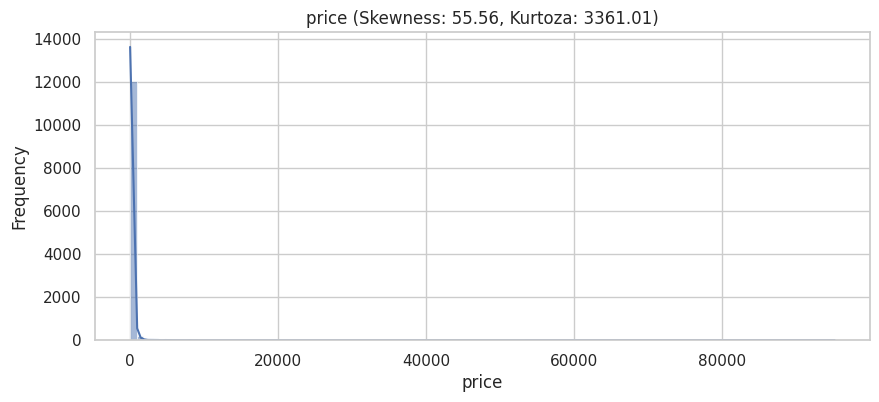

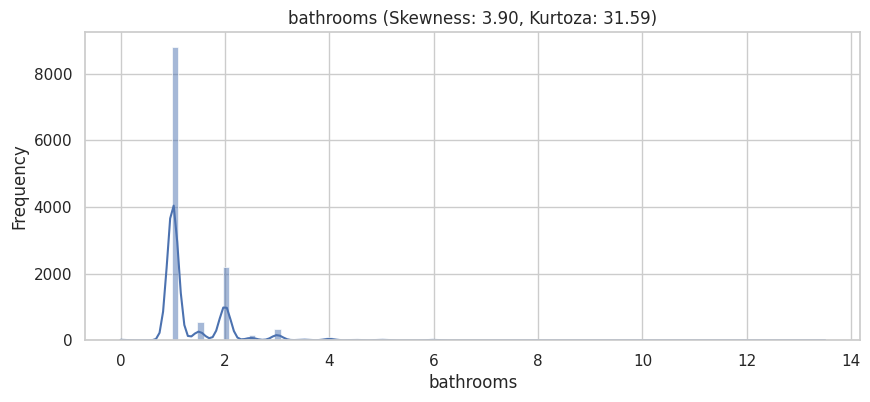

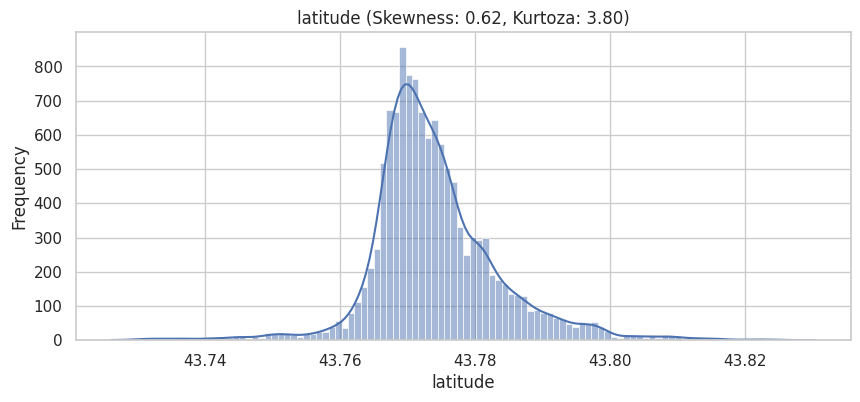

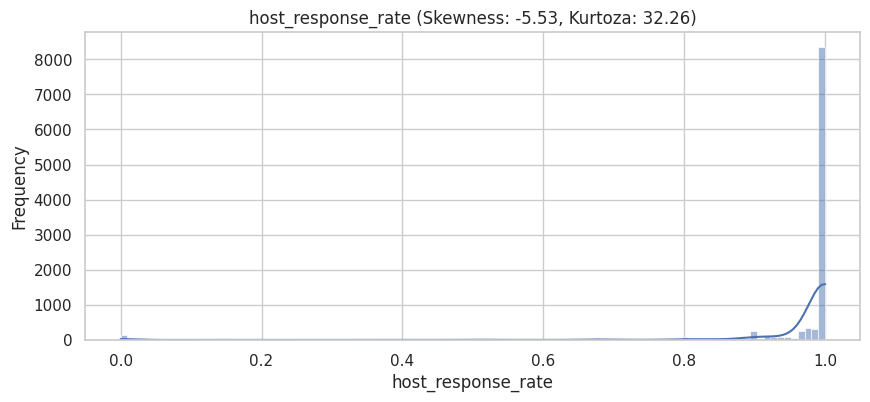

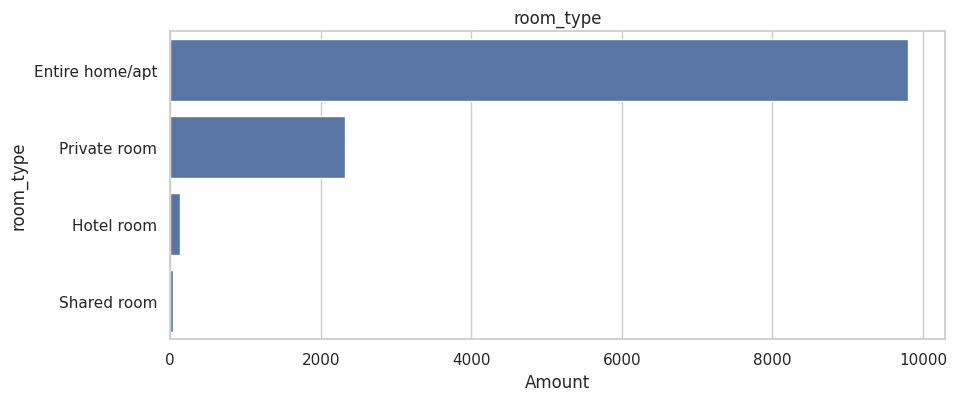

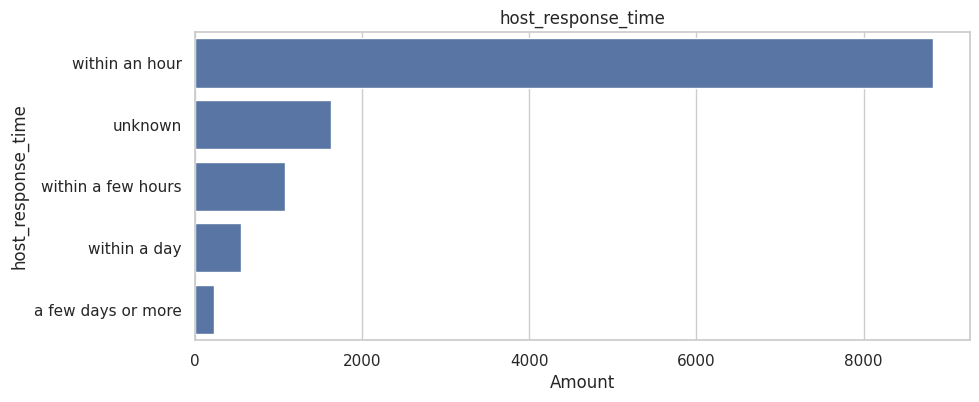

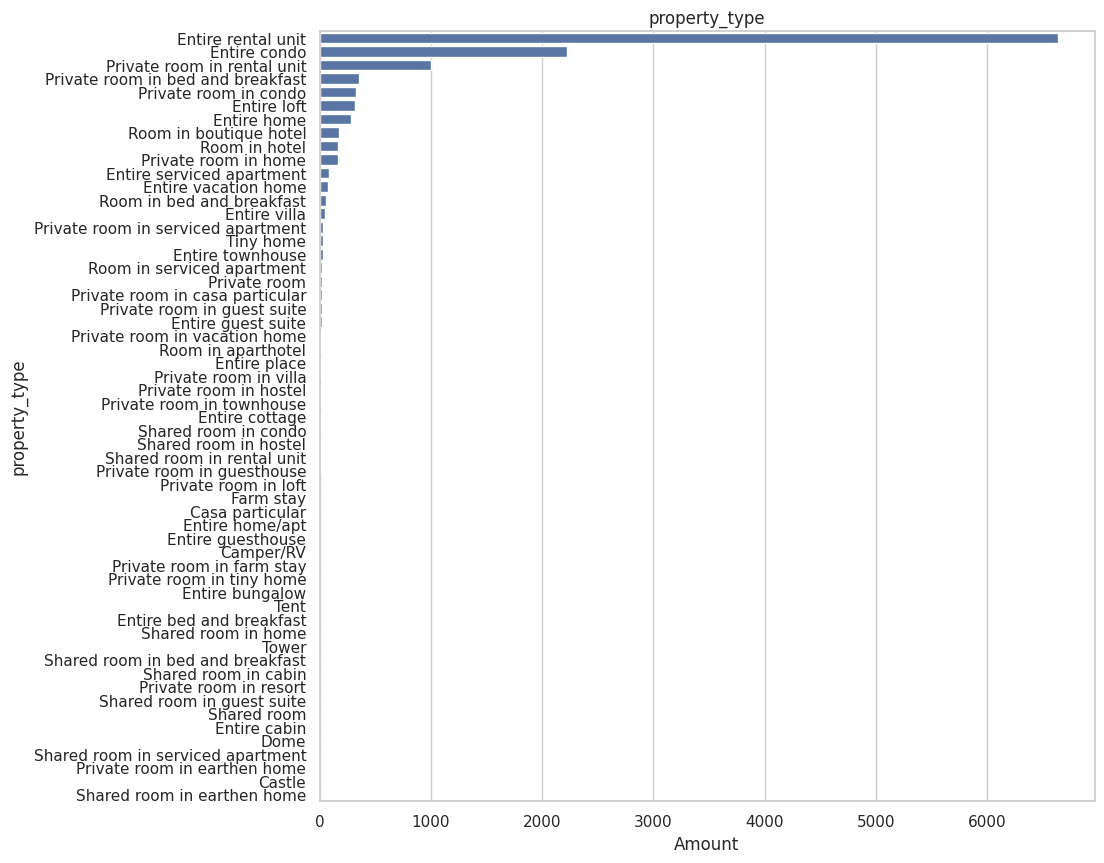

In [252]:
from scipy.stats import skew, kurtosis

sns.set(style="whitegrid")

# Columns
numeric_columns = ['price', 'bathrooms','latitude', 'host_response_rate']
categorical_columns = ['room_type', 'host_response_time']
property_column = ['property_type']

num_bins = {col: int(np.sqrt(len(df[col].dropna()))) for col in numeric_columns}

# Histograms
for column in numeric_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column].dropna(), bins=num_bins[column], kde=True)
    plt.title(f'{column} (Skewness: {df[column].skew():.2f}, Kurtoza: {df[column].kurtosis():.2f})')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    print()

# Categorical
for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    order = df[column].value_counts().index
    sns.countplot(y=df[column], order=order)
    plt.title(f'{column}')
    plt.xlabel('Amount')
    plt.ylabel(column)
    plt.show()
    print()

for column in property_column:
    plt.figure(figsize=(10, 10))
    order = df[column].value_counts().index
    sns.countplot(y=df[column], order=order)
    plt.title(f'{column}')
    plt.xlabel('Amount')
    plt.ylabel(column)
    plt.show()
    print()

# V. Missing data
I am filling in the missing data, there is not enough data for many categories, so I can fill it with the median or mean.</br>
I then display the graphs of all the variables and see that it would be useful to trim the outliers.</br>
I display the effect of the work and normalize the numerical data.

In [253]:
df_isna = df.isna().sum() > 0
df.loc[:,df_isna].isna().sum().sort_values(ascending=False) / len(df)*100

bedrooms                      16.96
host_response_rate            13.20
review_scores_location        12.46
review_scores_value           12.46
review_scores_checkin         12.46
review_scores_communication   12.46
review_scores_accuracy        12.46
review_scores_cleanliness     12.46
review_scores_rating          12.18
reviews_per_month             12.18
first_review                  12.18
last_review                   12.18
host_acceptance_rate           9.69
description                    1.51
beds                           0.71
bathrooms                      0.15
bathrooms_text                 0.03
dtype: float64

In [254]:
df['bedrooms'].unique()

<IntegerArray>
[1, 2, <NA>, 3, 5, 4, 6, 7, 8, 9, 13, 11, 10, 12]
Length: 14, dtype: Int64

In [255]:
for column in ['host_response_rate', 'host_acceptance_rate']:
    df[column].fillna(df[column].median(), inplace=True)

In [256]:
df

id                                      listing_url  \
0                   31840               https://www.airbnb.com/rooms/31840   
1                   32120               https://www.airbnb.com/rooms/32120   
2                   32180               https://www.airbnb.com/rooms/32180   
3                   32395               https://www.airbnb.com/rooms/32395   
4                   39115               https://www.airbnb.com/rooms/39115   
...                   ...                                              ...   
12303  977648688222471965  https://www.airbnb.com/rooms/977648688222471965   
12304  978035718207345024  https://www.airbnb.com/rooms/978035718207345024   
12305  978042403012681814  https://www.airbnb.com/rooms/978042403012681814   
12306  978179177581125651  https://www.airbnb.com/rooms/978179177581125651   
12307  979092985999665461  https://www.airbnb.com/rooms/979092985999665461   

      last_scraped       source  \
0       2023-09-13  city scrape   
1       2023-09-13  city scrape   
2       2023-09-13  city scrape   
3       2023-09-13  city scrape   
4       2023-09-13  city scrape   
...            ...          ...   
12303   2023-09-13  city scrape   
12304   2023-09-13  city scrape   
12305   2023-09-13  city scrape   
12306   2023-09-14  city scrape   
12307   2023-09-13  city scrape   

                                                    name  \
0      Serviced apartment in Florence · ★4.65 · 1 bed...   
1      Rental unit in Florence · ★4.88 · 1 bedroom · ...   
2      Condo in Florence · ★4.77 · 2 bedrooms · 4 bed...   
3      Bed and breakfast in Florence · ★4.84 · 1 bedr...   
4      Home in Florence · ★4.56 · 1 bedroom · 2 beds ...   
...                                                  ...   
12303  Rental unit in Florence · ★New · 2 bedrooms · ...   
12304  Rental unit in Florence · ★New · 2 bedrooms · ...   
12305  Condo in Florence · ★New · 2 bedrooms · 2 beds...   
12306  Condo in Florence · ★New · 1 bedroom · 2 beds ...   
12307  Bed and breakfast in Florence · ★New · 1 bedro...   

                                             description  \
0      Nice, private and quiet double room, classic s...   
1      Apartment at a 30 minute walk from Ponte Vecch...   
2      .<br /><br /><b>The space</b><br />If you are ...   
3      <b>The space</b><br />nice room with private b...   
4      Double (or Twin) Room Shared Bathroom: comfort...   
...                                                  ...   
12303  Goditi una vacanza all'insegna dello stile in ...   
12304  Located in the center of Florence, just a shor...   
12305  Grazie a questo spazio in posizione strategica...   
12306  Charming 45 sqm apartment, ideal for 4 people....   
12307  Questo spazio elegante è a 2 passi da mete imp...   

                                             picture_url    host_id  \
0      https://a0.muscache.com/pictures/09da8cb8-47df...     380378   
1      https://a0.muscache.com/pictures/miso/Hosting-...      99235   
2      https://a0.muscache.com/pictures/bcb23395-7215...   13925330   
3      https://a0.muscache.com/pictures/77634944/f0bf...     140170   
4      https://a0.muscache.com/pictures/17793998/5f09...     167739   
...                                                  ...        ...   
12303  https://a0.muscache.com/pictures/hosting/Hosti...  528370625   
12304  https://a0.muscache.com/pictures/miso/Hosting-...     362247   
12305  https://a0.muscache.com/pictures/miso/Hosting-...    1172010   
12306  https://a0.muscache.com/pictures/miso/Hosting-...   96122546   
12307  https://a0.muscache.com/pictures/hosting/Hosti...   45605559   

                                          host_url  \
0         https://www.airbnb.com/users/show/380378   
1          https://www.airbnb.com/users/show/99235   
2       https://www.airbnb.com/users/show/13925330   
3         https://www.airbnb.com/users/show/140170   
4         https://www.airbnb.com/users/show/167739   
...                                           

In [257]:
def fill_missing_data(df):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            df[column].fillna(df[column].median(), inplace=True)
        elif pd.api.types.is_datetime64_any_dtype(df[column]):
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            df[column].fillna(df[column].mode()[0], inplace=True)

fill_missing_data(df)

In [258]:
df_isna = df.isna().sum() > 0
df.loc[:,df_isna].isna().sum().sort_values(ascending=False) / len(df)*100

Series([], dtype: float64)

In [259]:
unique_values = df['bathrooms'].unique()
print(unique_values)

[ 1.   2.   0.   1.5  3.   6.   4.   4.5  3.5  2.5  5.5  5.   9.   8.
  6.5  7.  13.  13.5  7.5 11.5]


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12308 entries, 0 to 12307
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            12308 non-null  int64         
 1   listing_url                                   12308 non-null  object        
 2   last_scraped                                  12308 non-null  datetime64[ns]
 3   source                                        12308 non-null  category      
 4   name                                          12308 non-null  object        
 5   description                                   12308 non-null  object        
 6   picture_url                                   12308 non-null  object        
 7   host_id                                       12308 non-null  int64         
 8   host_url                                      12308 non-null  obje

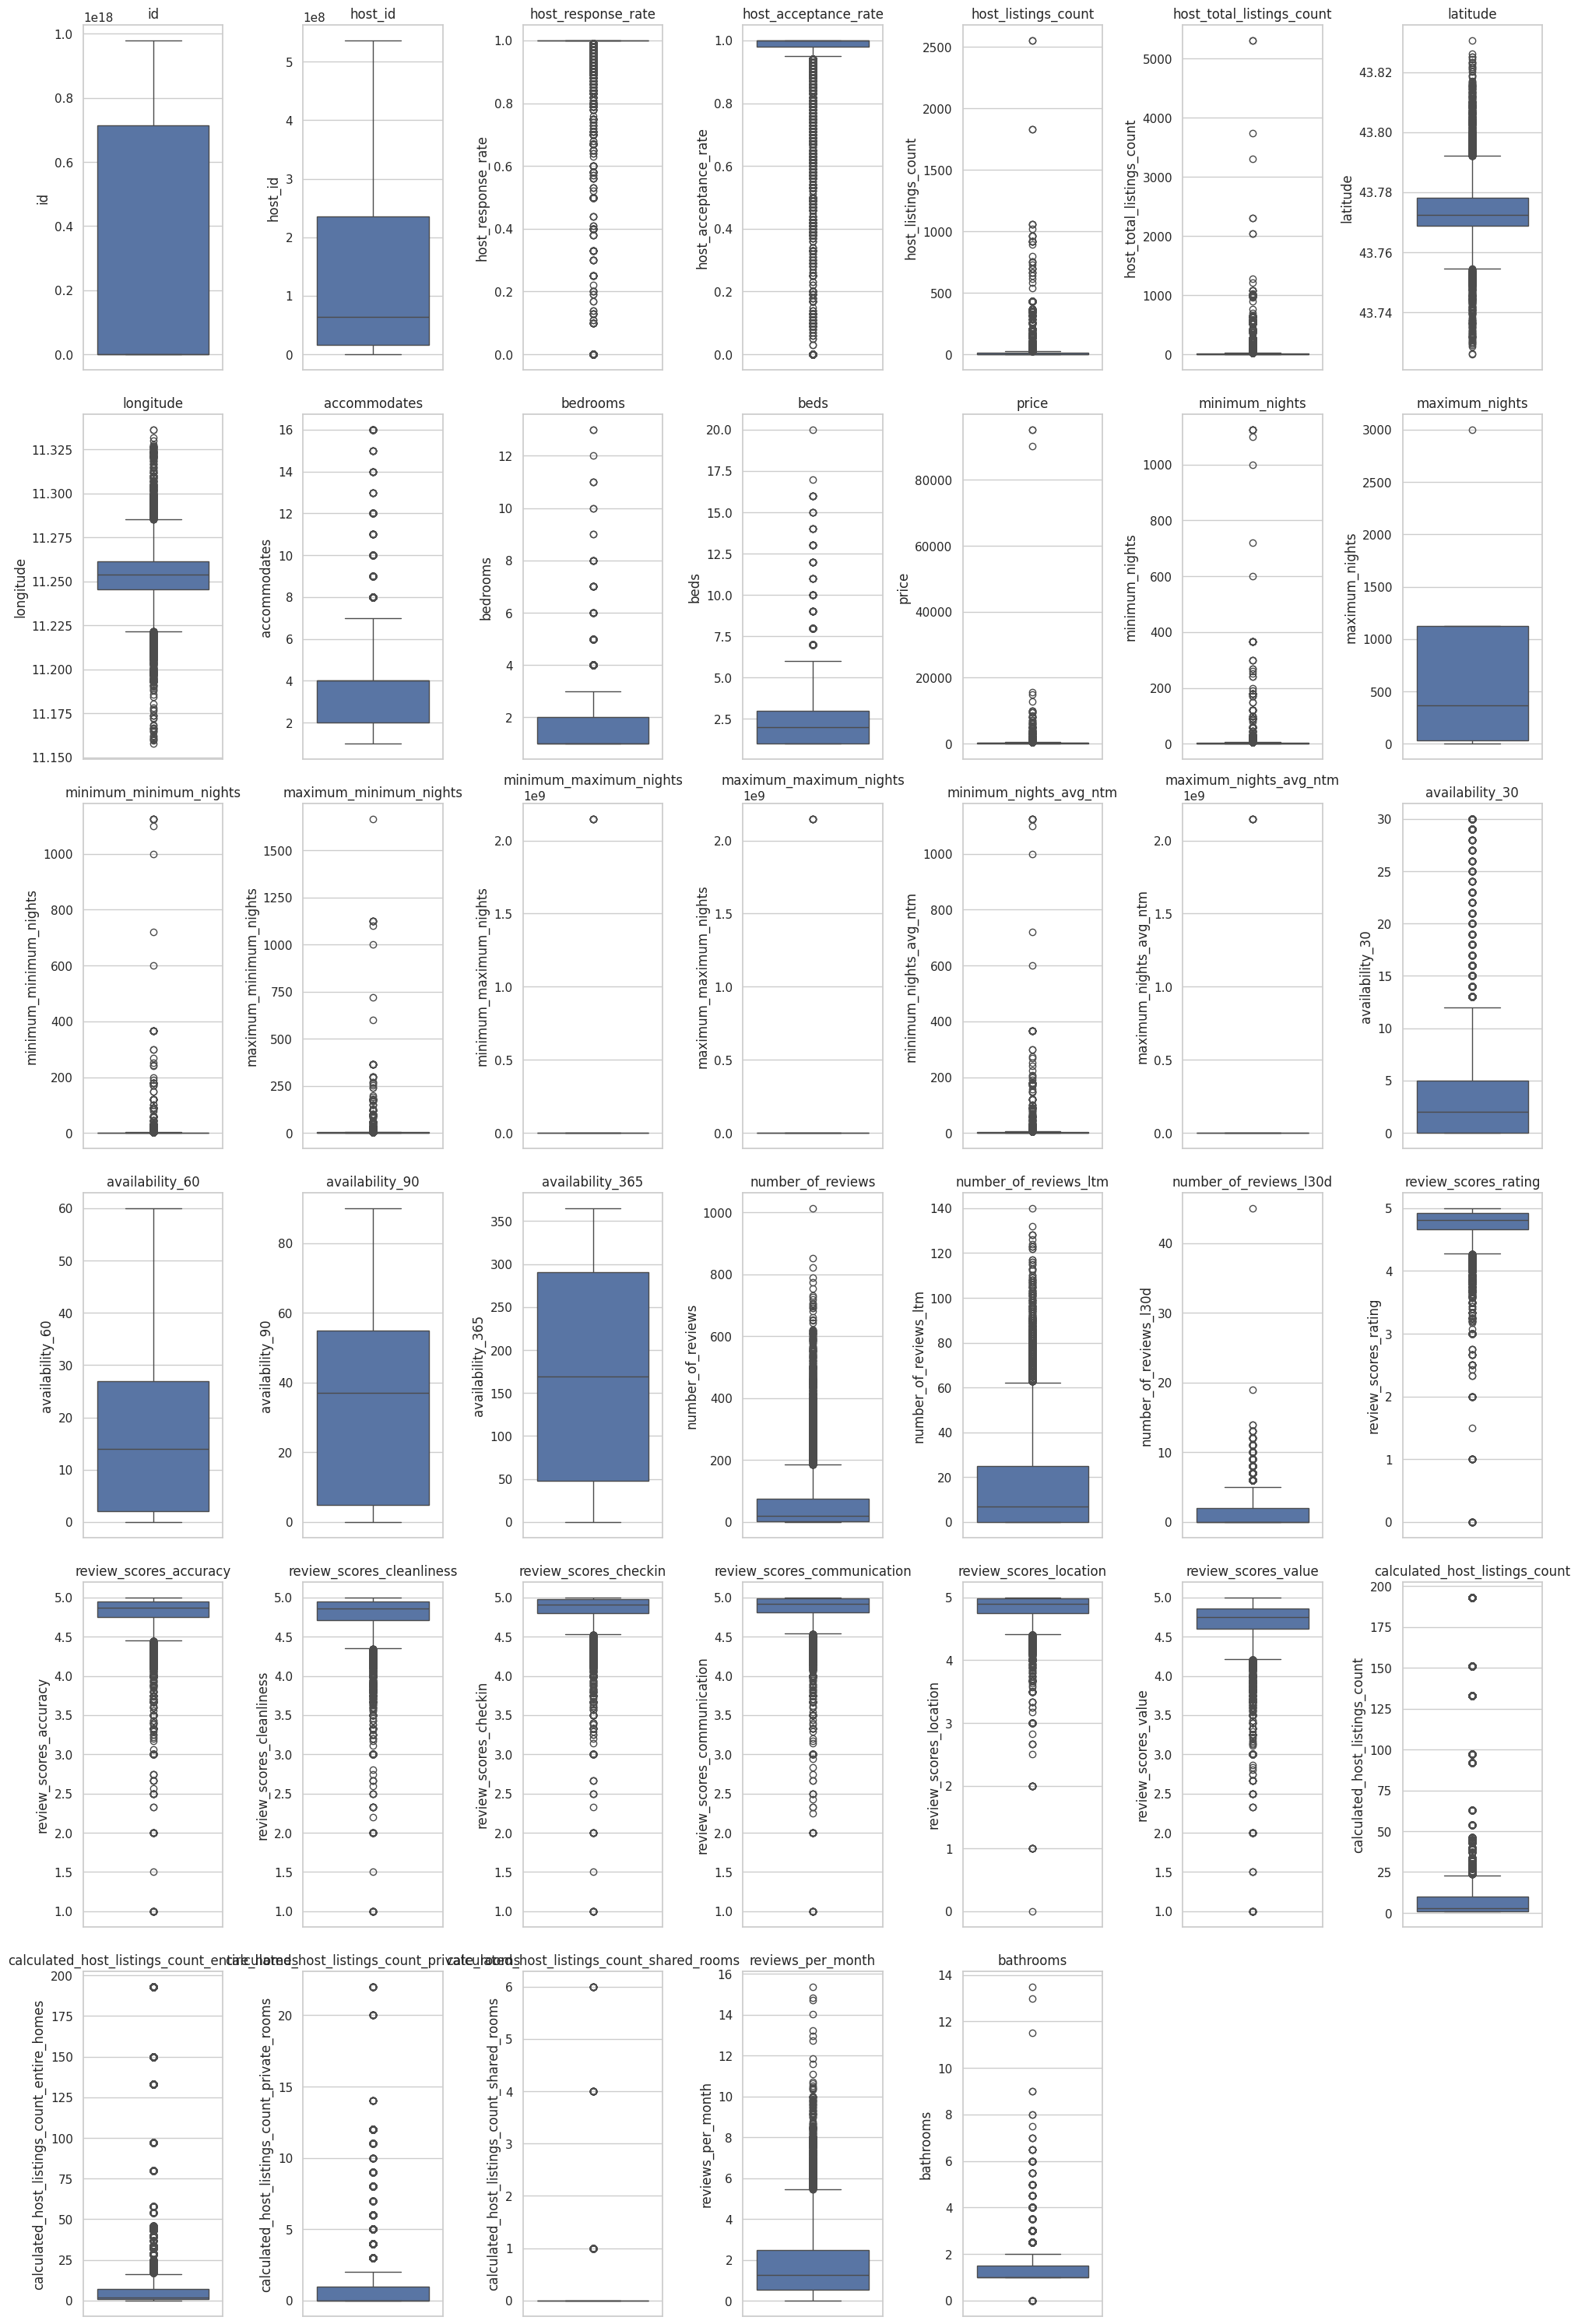

In [261]:
# Presentation of numerical variables for trim analysis
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

num_columns = len(numeric_columns)

num_rows = (num_columns - 1)

plt.figure(figsize=(20, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 7, i)
    sns.boxplot(data=df, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

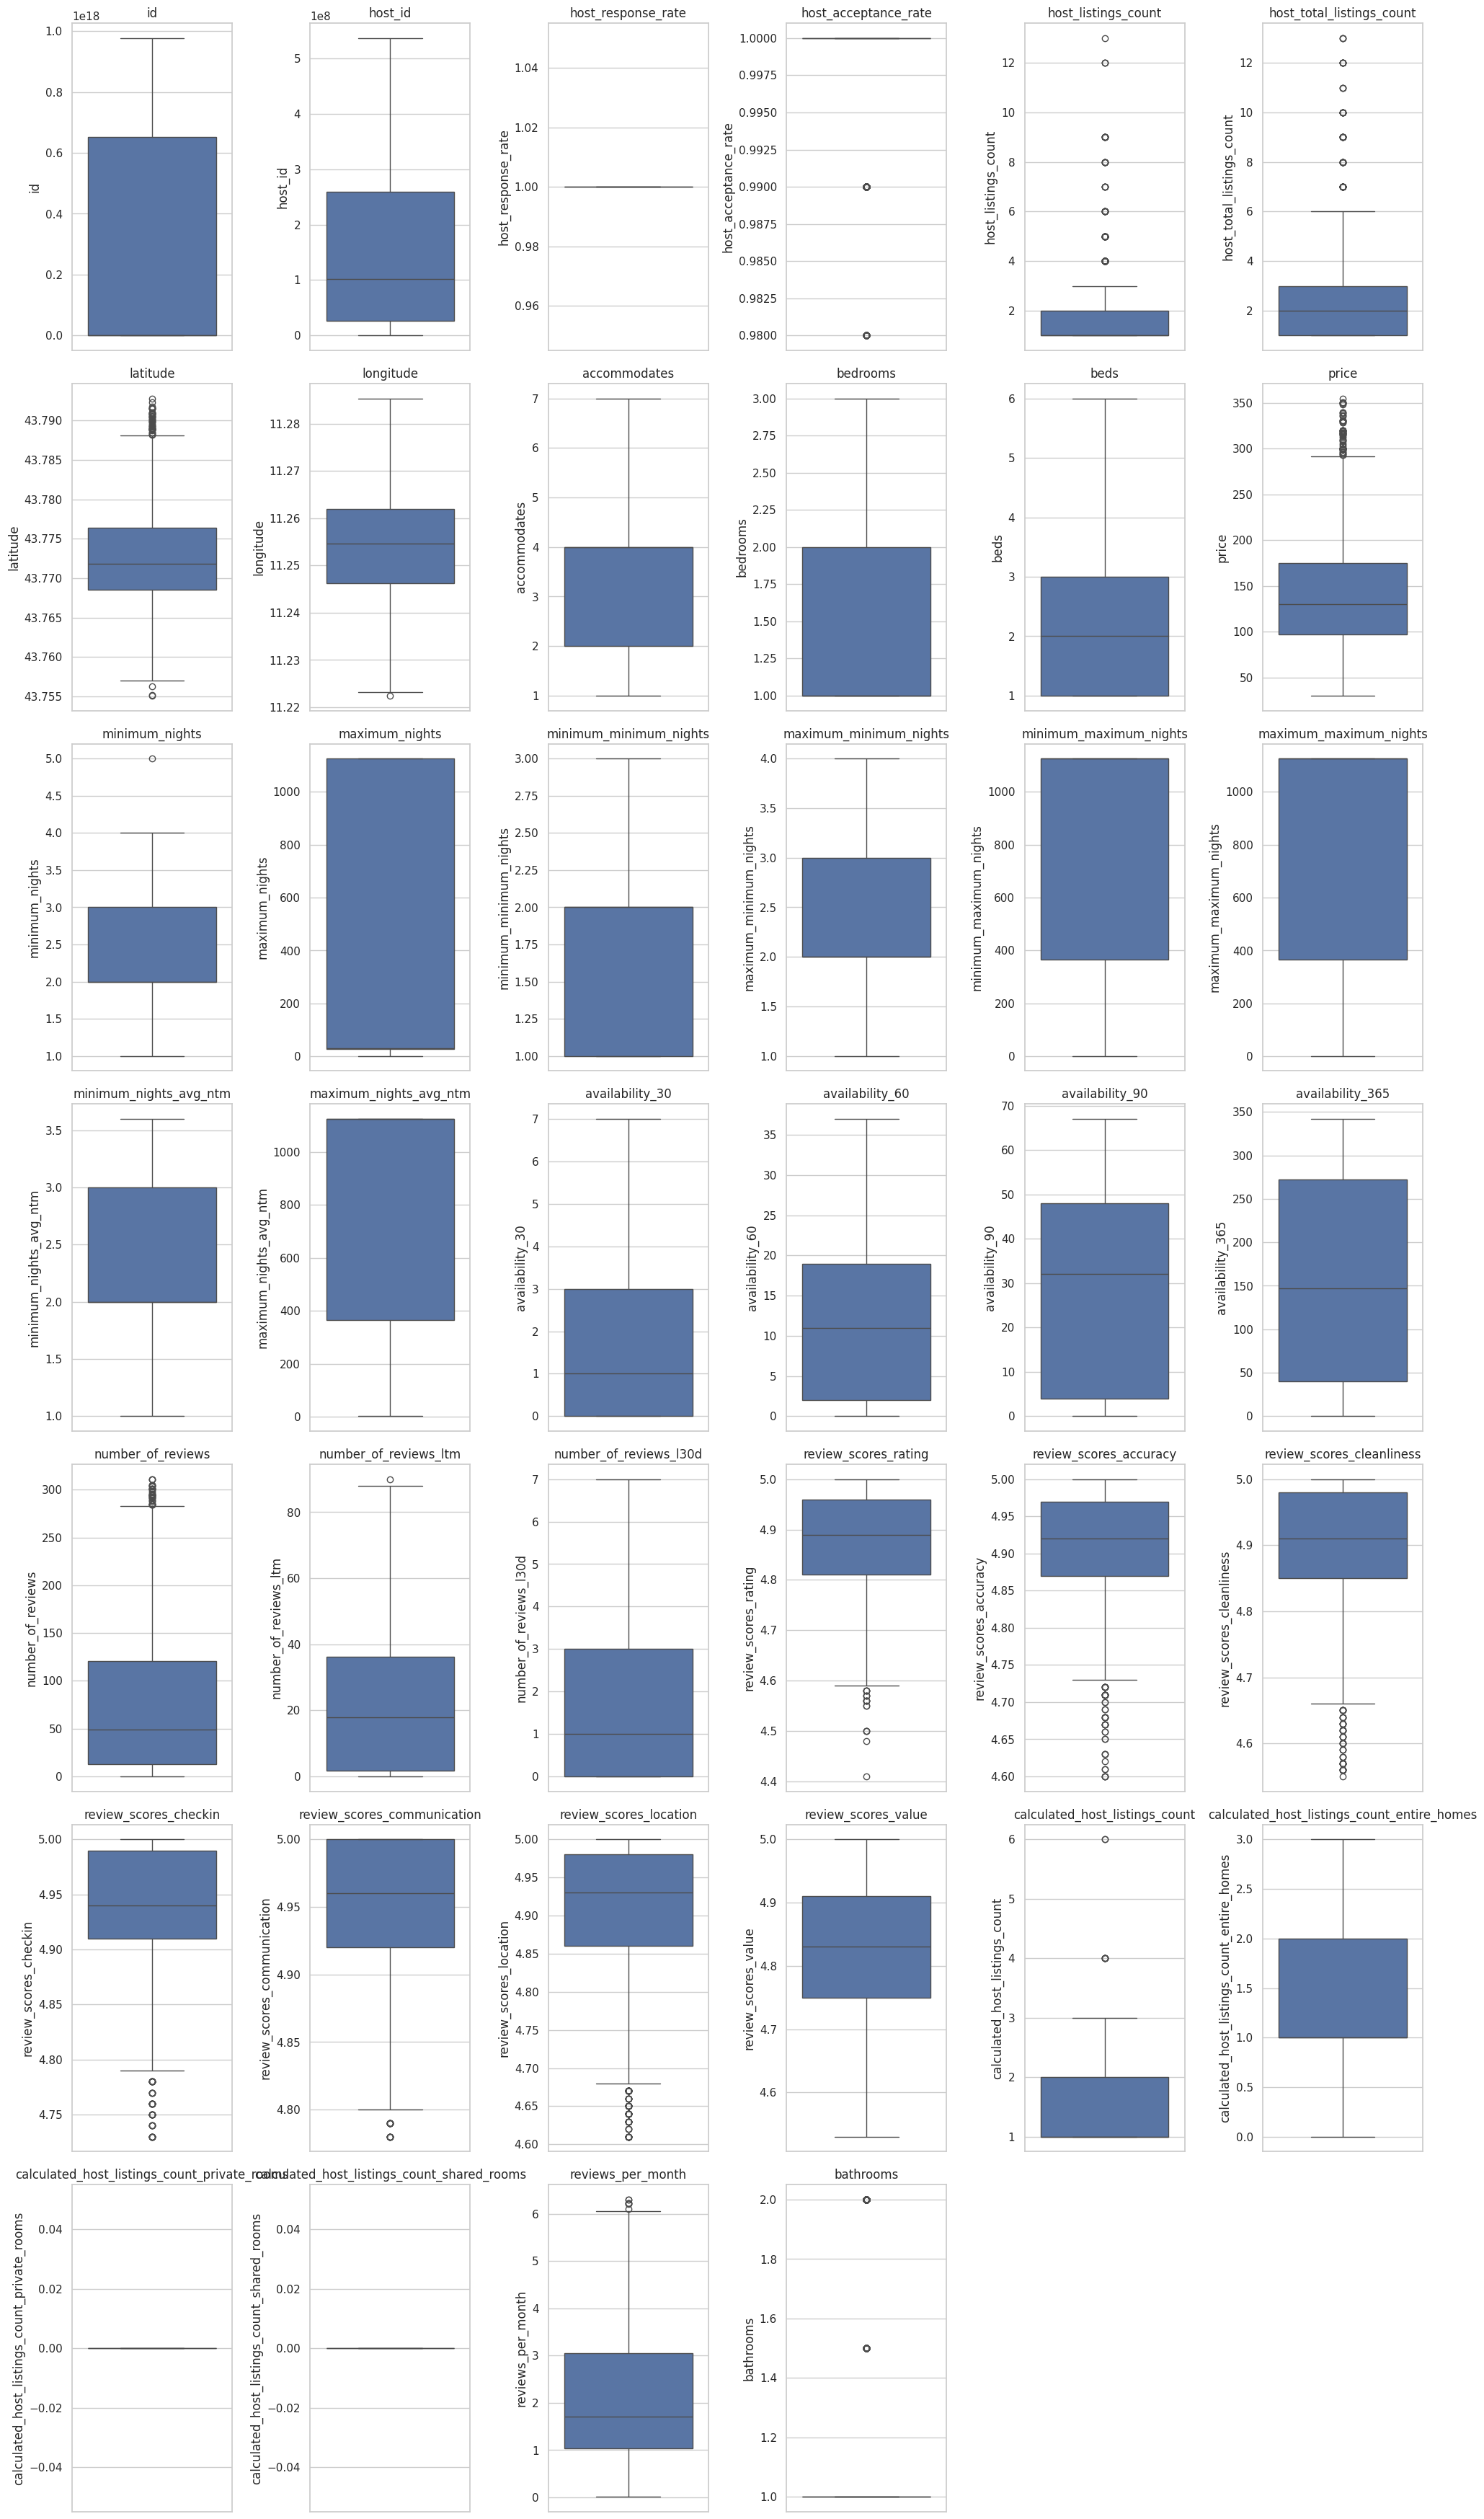

In [262]:
def remove_outliners(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in numeric_columns:
    df = remove_outliners(df, column)

plt.figure(figsize=(20, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 6, i)
    sns.boxplot(data=df, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

In [263]:
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler

numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)
df_normalized.head()

id  host_id  host_response_rate  host_acceptance_rate  \
0 -0.66    -0.99                0.00                  0.35   
1 -0.66    -0.99                0.00                  0.35   
2 -0.66    -0.99                0.00                  0.35   
3 -0.66    -0.99                0.00                  0.35   
4 -0.66    -0.99                0.00                  0.35   

   host_listings_count  host_total_listings_count  latitude  longitude  \
0                 1.63                       3.21      0.99       0.34   
1                -0.61                      -0.13      0.28       0.15   
2                -0.61                       0.98     -0.36       0.97   
3                 0.14                      -0.13     -1.66      -1.01   
4                 0.14                      -0.13     -0.14       0.64   

   accommodates  bedrooms  beds  price  minimum_nights  maximum_nights  \
0         -0.52     -0.72 -1.07  -0.30            1.24            0.73   
1         -1.30     -0.72 -1.07   0.27            1.24            1.57   
2         -0.52     -0.72 -0.11  -0.75           -0.22           -0.76   
3          0.26      0.98 -0.11  -1.29           -0.22           -0.76   
4          0.26     -0.72 -1.07   0.11            1.24           -0.78   

   minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
0                    1.45                    0.98                   -0.16   
1                    1.45                    0.98                    0.68   
2                    0.06                   -0.38                   -1.64   
3                    0.06                   -0.38                    0.68   
4                    1.45                    0.98                   -1.66   

   maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
0                   -0.21                    1.24                   -0.19   
1                    0.65                    1.24                    0.66   
2                   -1.73                   -0.25                   -1.71   
3                    0.65                   -0.25                    0.66   
4                   -1.00                    1.24                   -1.55   

   availability_30  availability_60  availability_90  availability_365  \
0            -0.97            -1.16            -1.33             -1.33   
1            -0.97            -1.16            -1.33             -1.23   
2             0.68            -0.09             0.42              1.22   
3            -0.97            -1.16            -1.33             -1.33   
4             2.34             1.66             1.25              1.41   

   number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
0              -0.42                  -0.86                   -0.92   
1               0.39                  -0.90                   -0.92   
2               2.17                   0.98                    2.60   
3              -0.83                  -1.04                   -0.92   
4               0.26                  -0.53                    0.09   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  1.05                    0.67                       1.07   
1                 -0.52                   -1.62                      -0.33   
2                 -2.09                   -3.27                      -2.03   
3                 -1.41                    1.18                       0.17   
4                 -2.29                   -2.12                      -1.83   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                  -0.86                         1.01                    0.19   
1                  -2.32                        -0.72                    0.59   
2                  -2.48                        -2.25                   -1.54   
3                   1.09                         1.01                   -0.83   
4                  -3.13                        -2.44                 

#VI. Correlation matrix,visualization
In the last task I deal with the correlation matrix, in my case Spearman's, and the visualization of numerical variables using graphs.</br>
I can see the results of my work. The analysis went as I expected and it seems promising.</br>
Finally, I examine the relationships between individual variables.</br>
I mainly check how the price changes in given cases - the number of bathrooms, type of accommodation, etc.

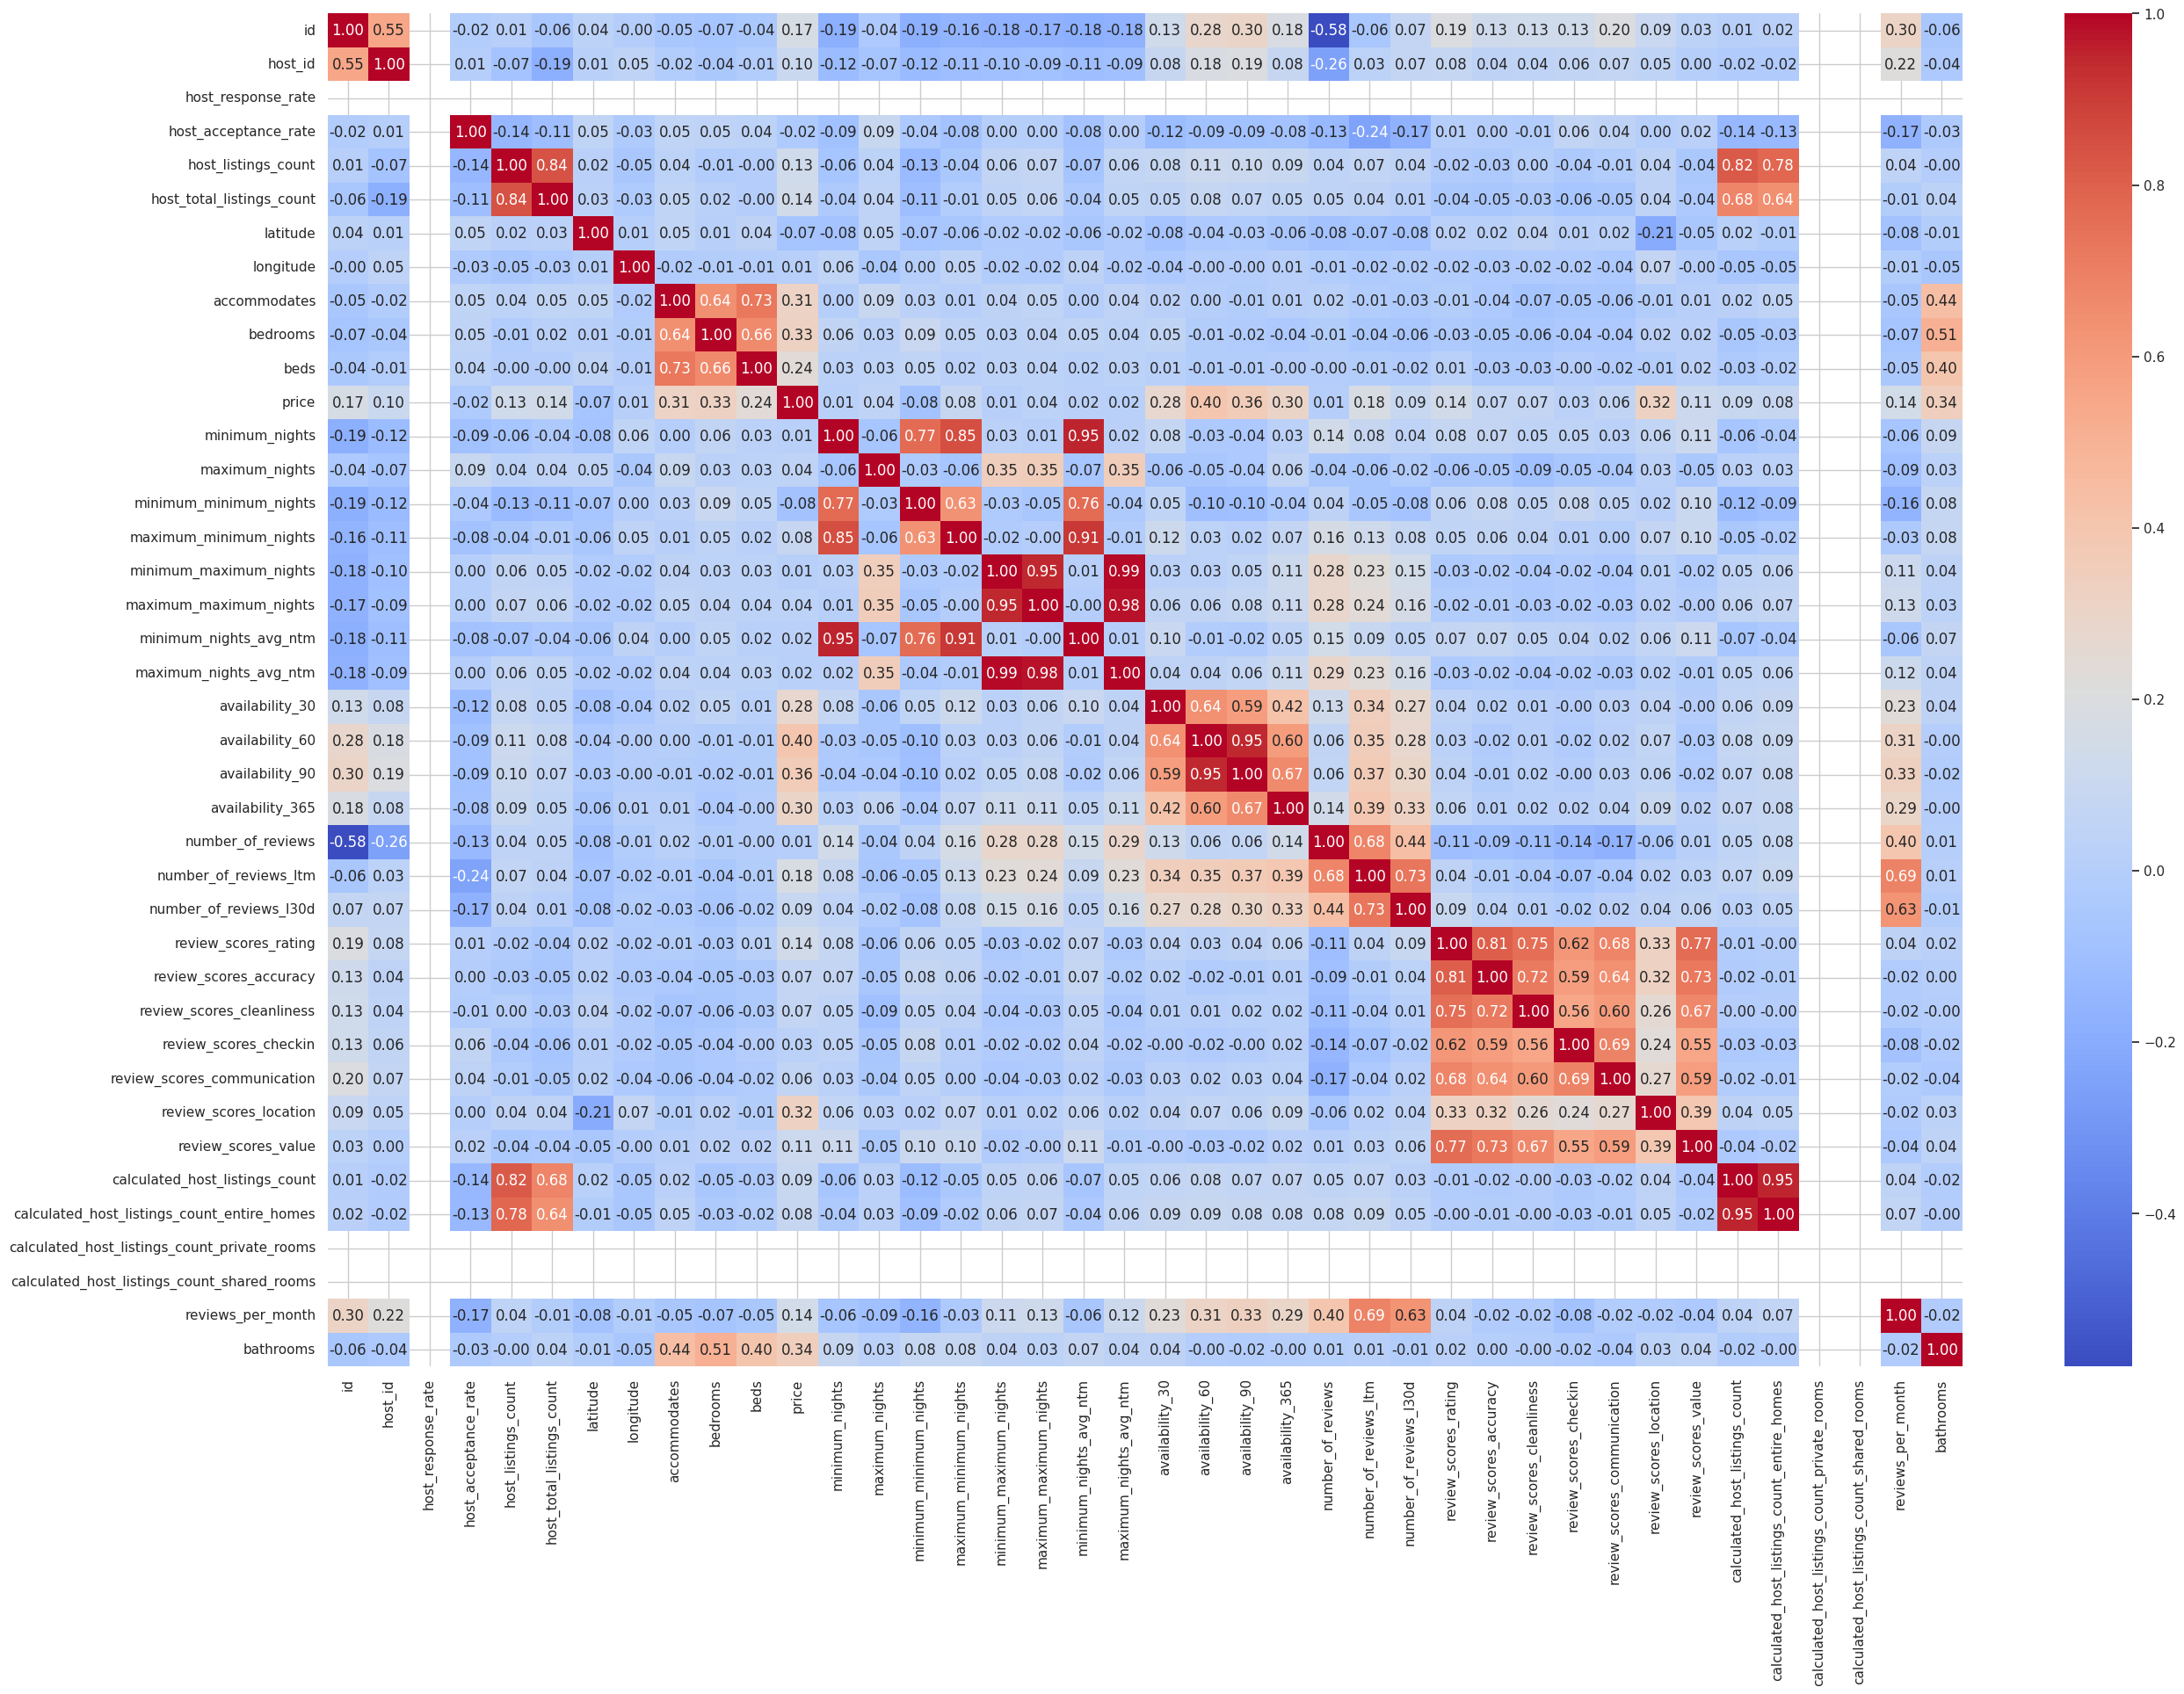

In [264]:
correlation_matrix = df.select_dtypes(include=['number']).corr(method='spearman')

plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

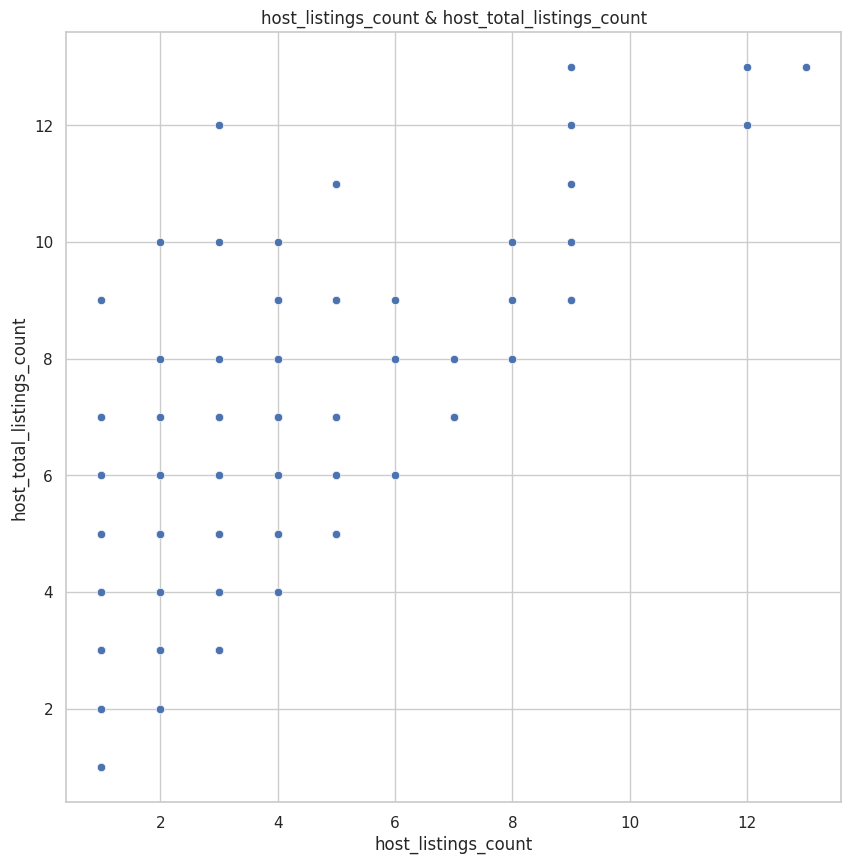

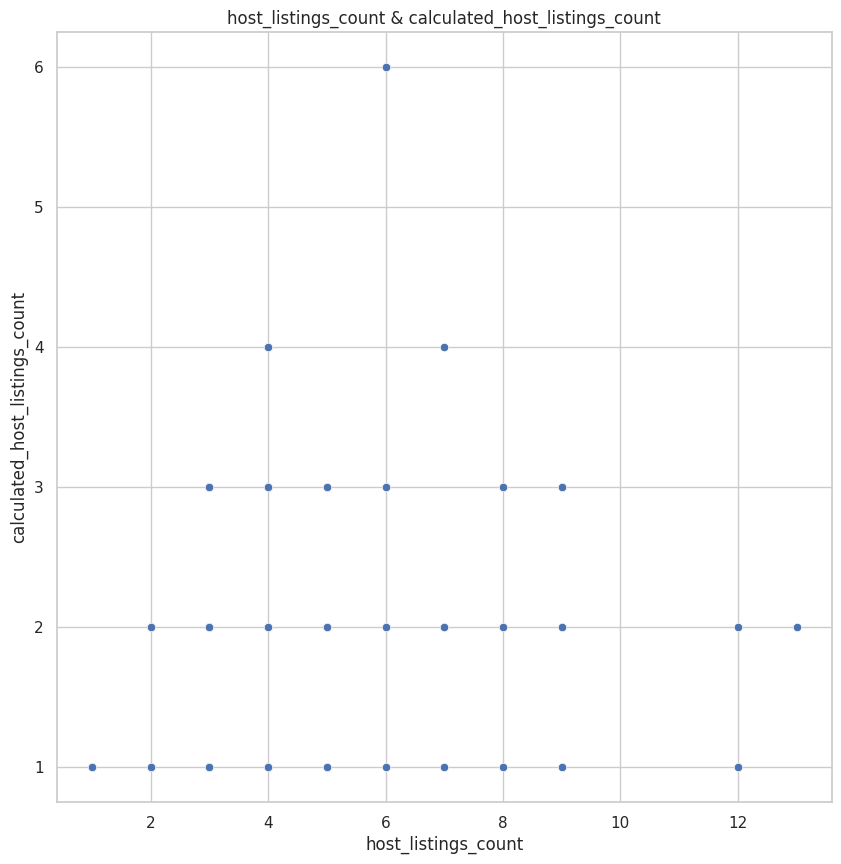

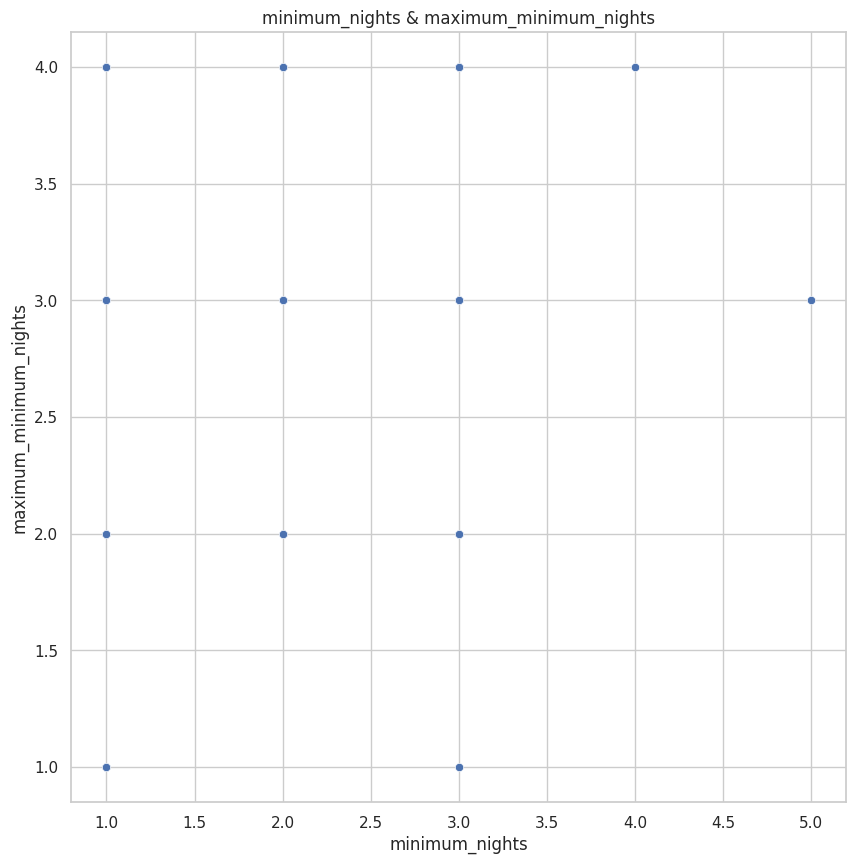

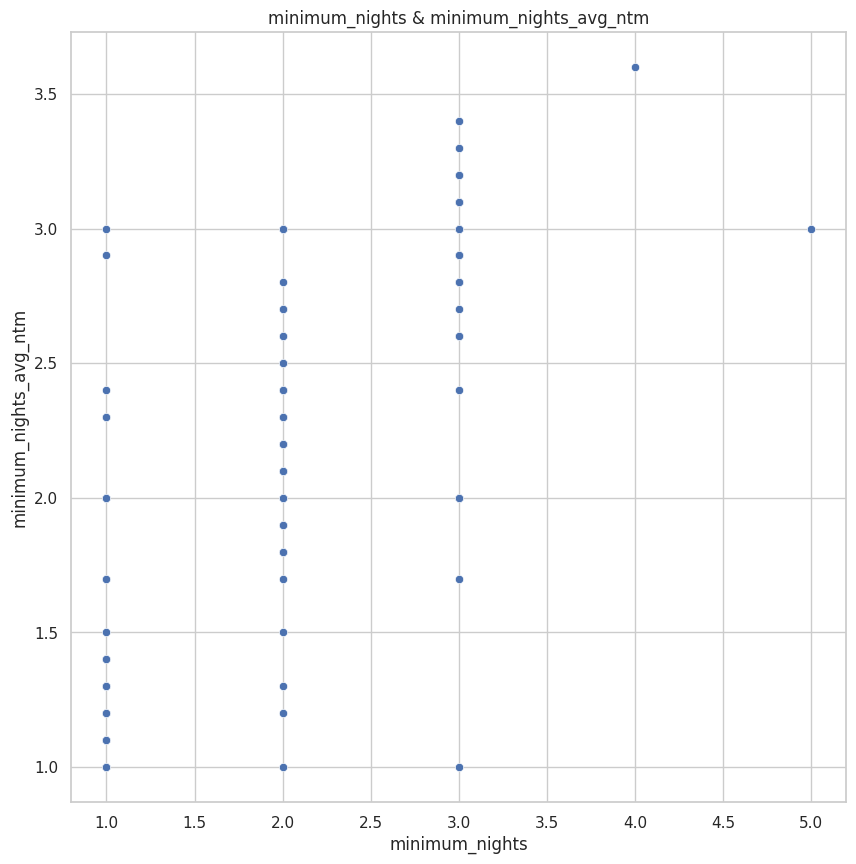

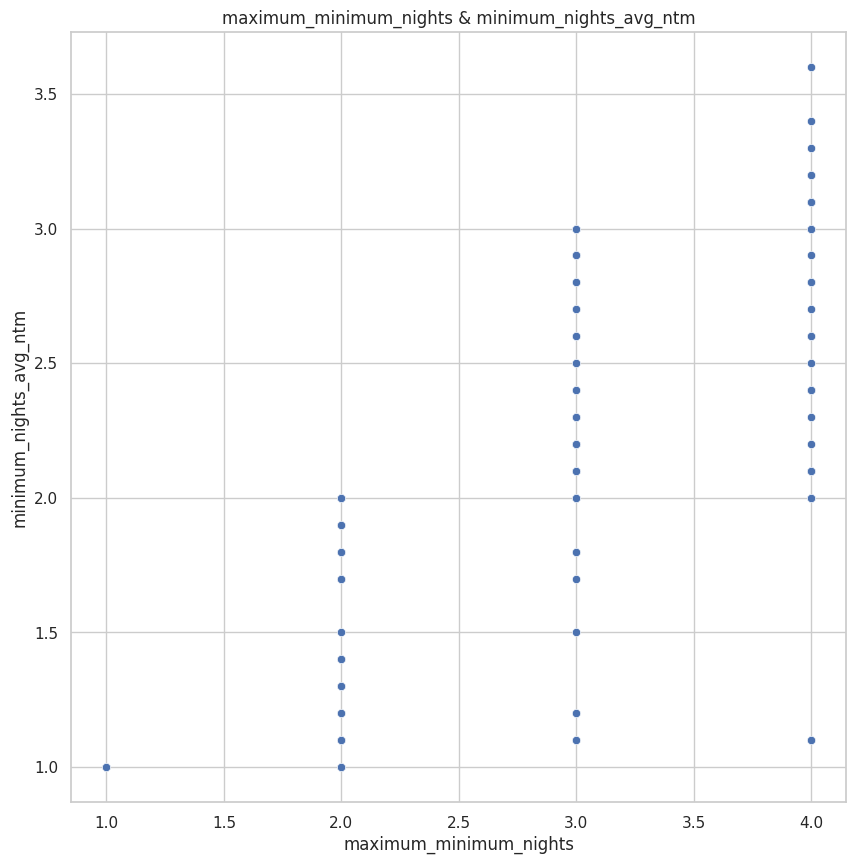

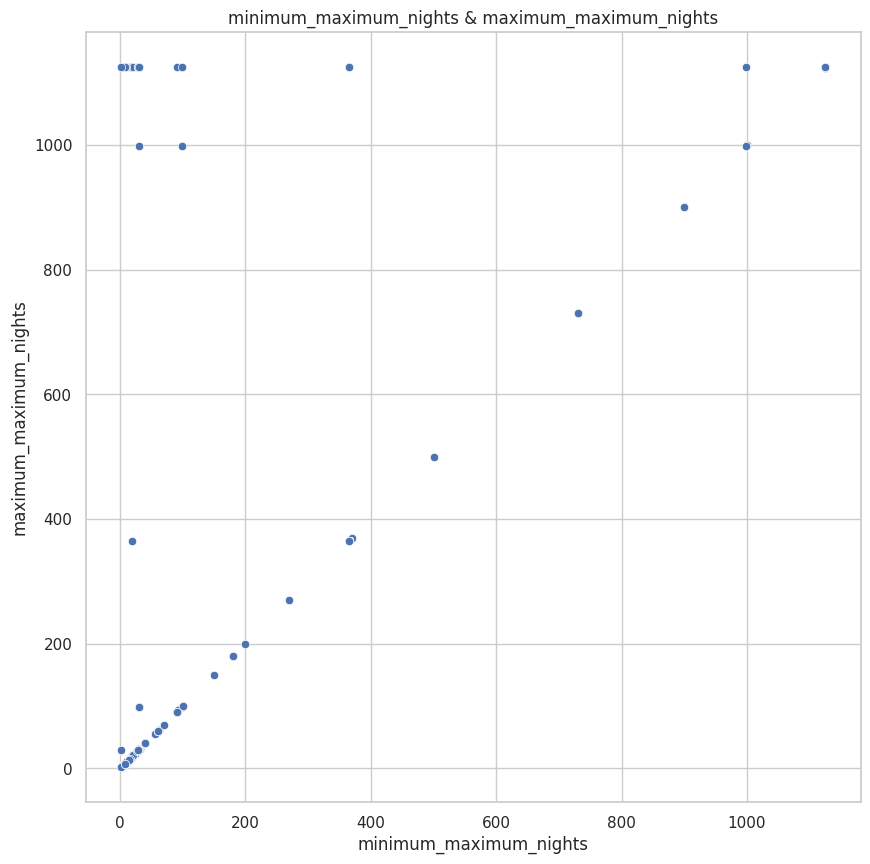

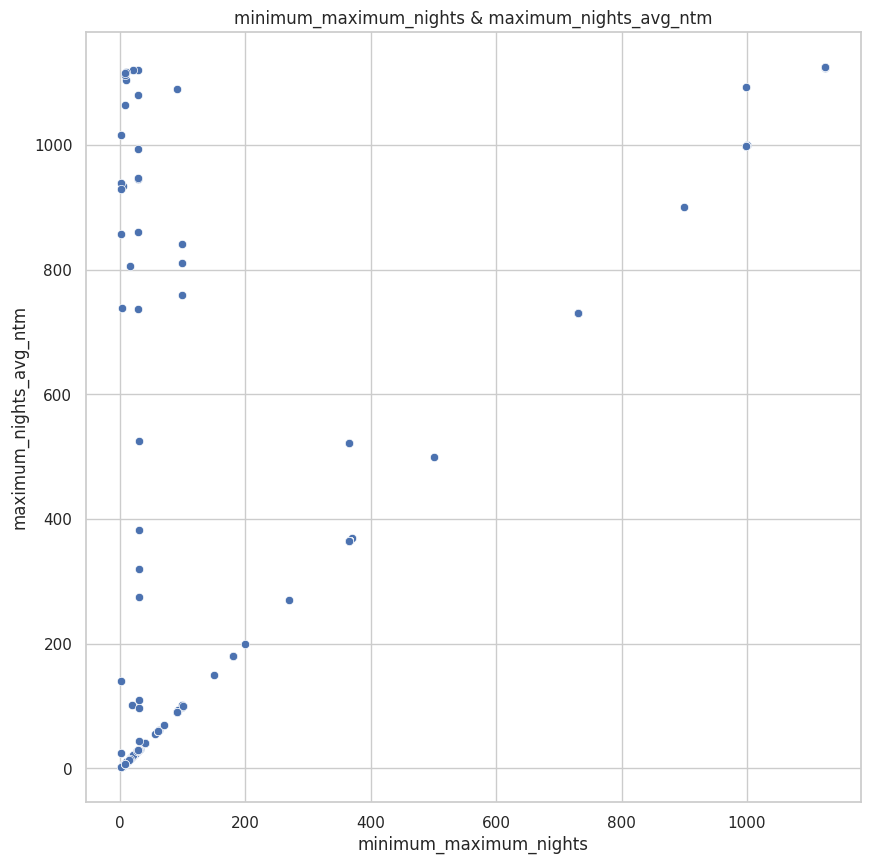

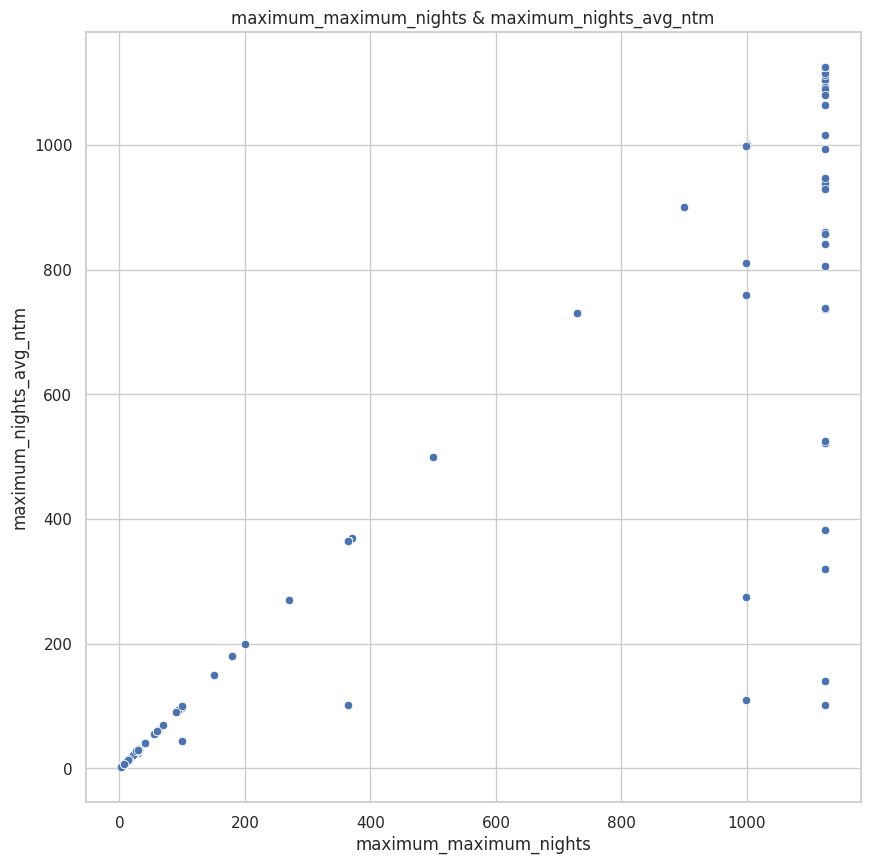

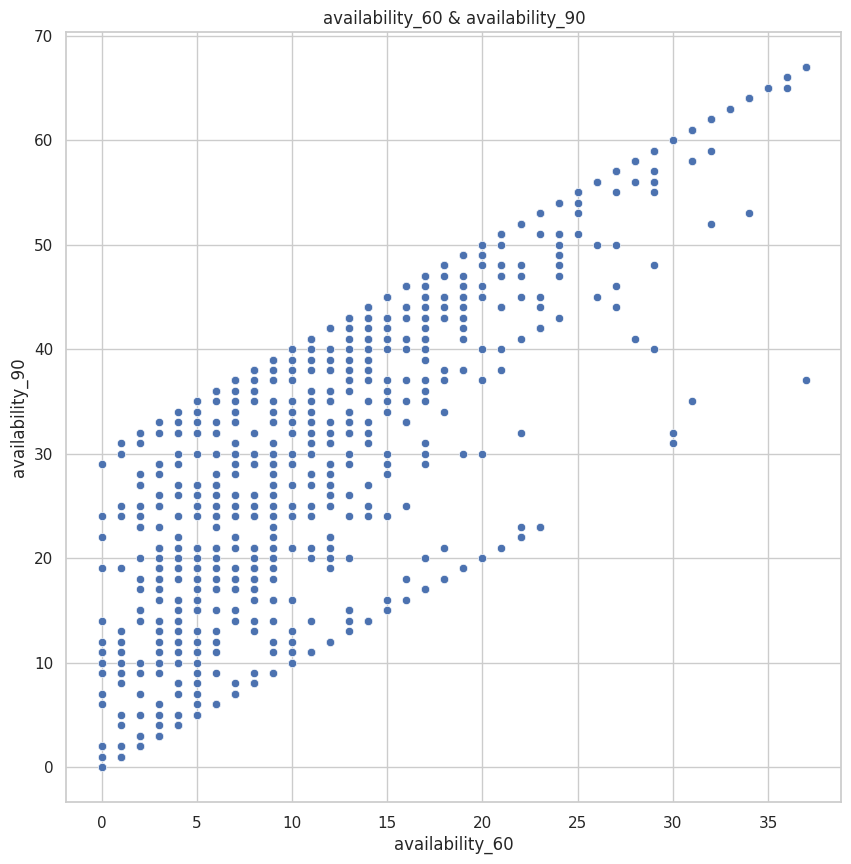

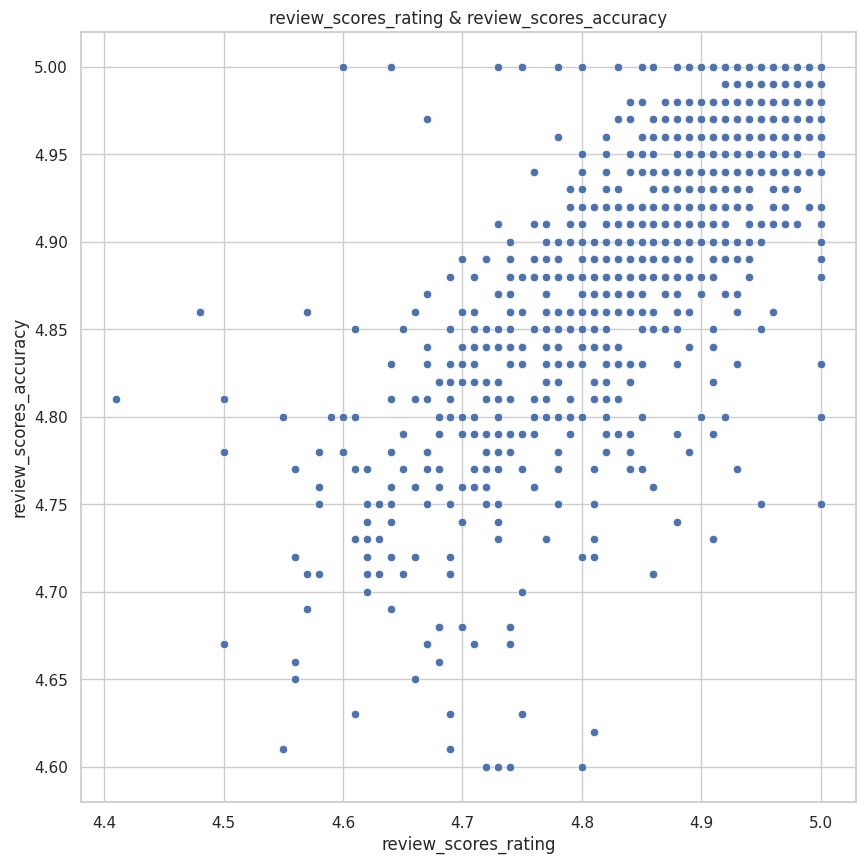

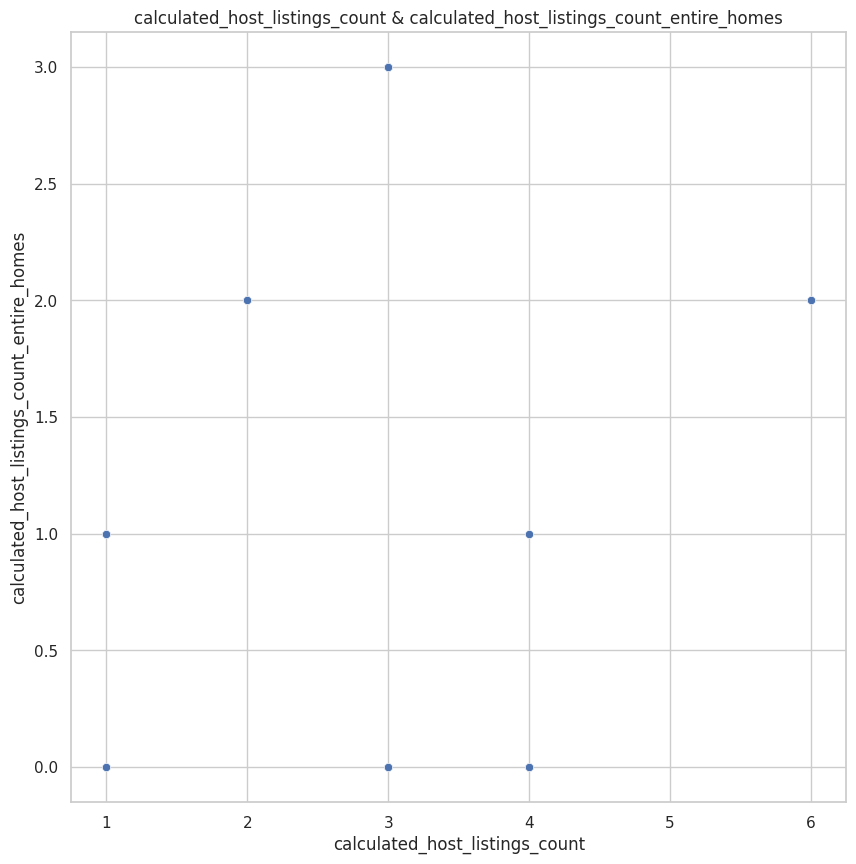

In [265]:
correlation = correlation_matrix.stack().reset_index()
correlation.columns = ['Variable 1', 'Variable 2', 'Correlation']
correlation = correlation[
    (correlation['Correlation'] > 0.8) | (correlation['Correlation'] < -0.8)
]

correlation = correlation[
    correlation['Variable 1'] != correlation['Variable 2']
].drop_duplicates(subset='Correlation')


scatter_plot_code = ""
for index, row in correlation.iterrows():
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    corr_value = row['Correlation']
    plt.figure(figsize=(10, 10))
    sns.scatterplot(data=df, x=var1, y=var2)
    plt.title(var1 + ' & ' + var2)
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()
    print()

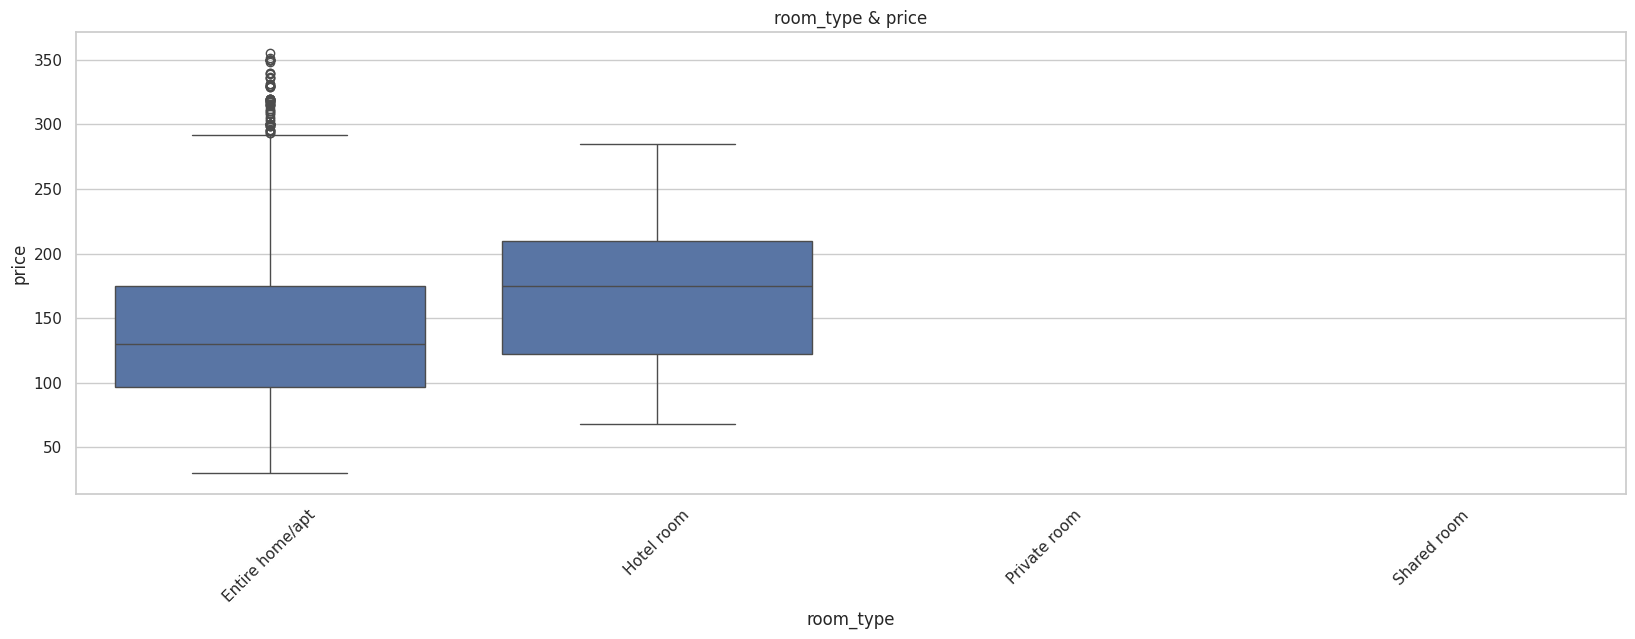

In [266]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='room_type', y='price')
plt.title('room_type & price')
plt.xticks(rotation=45)
plt.show()

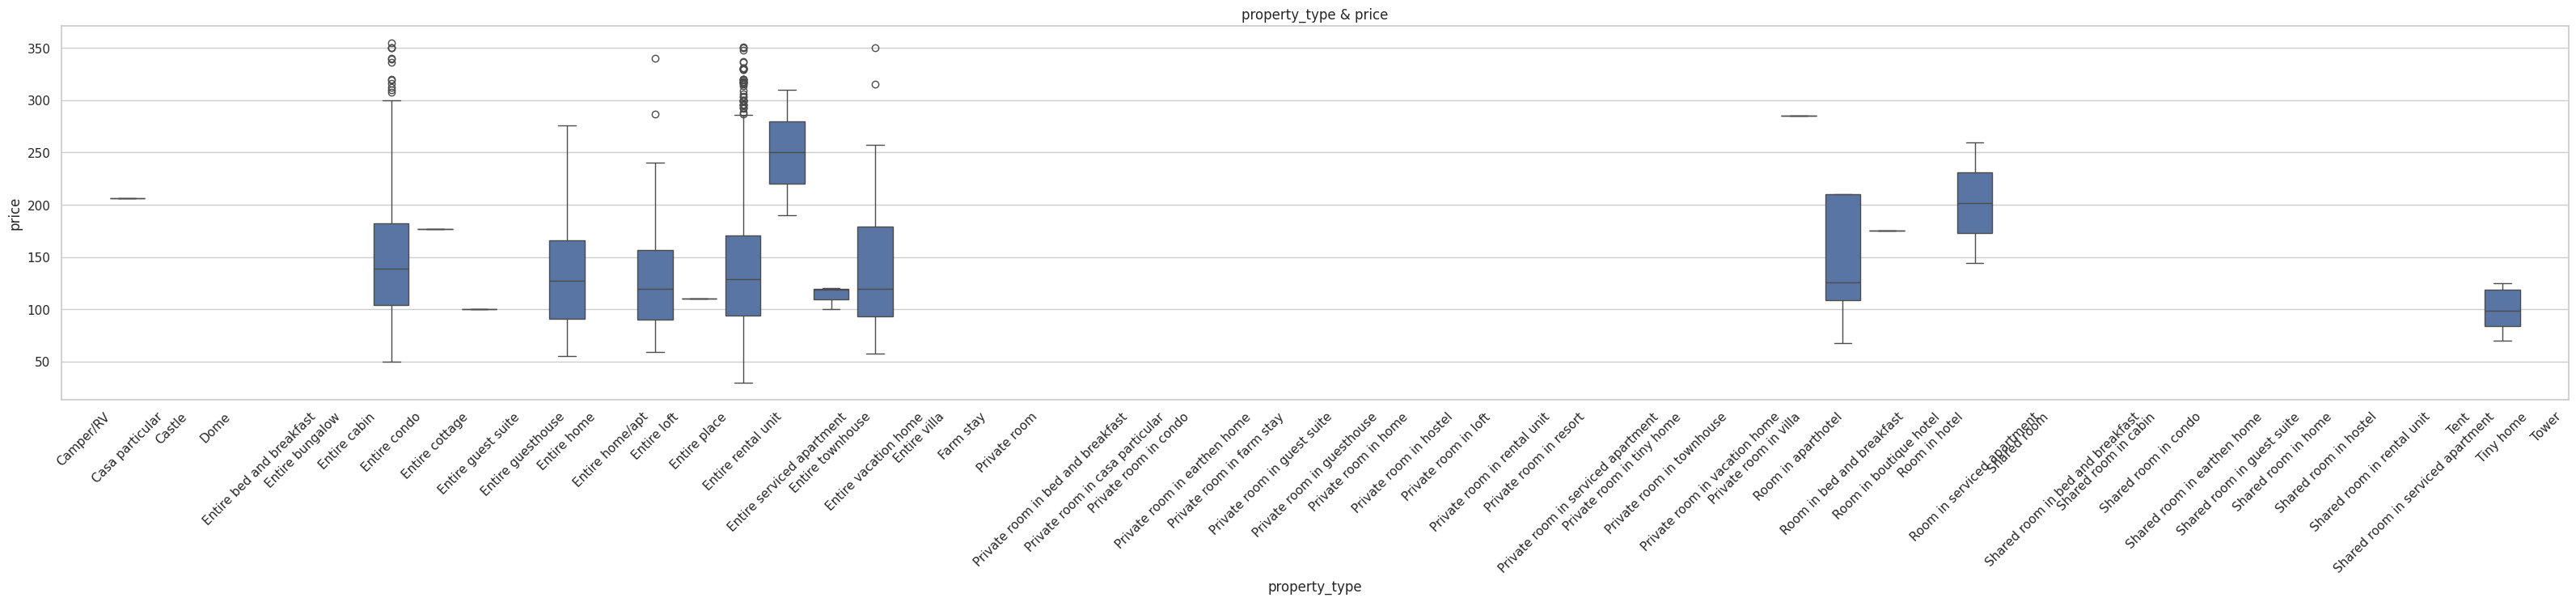

In [267]:
plt.figure(figsize=(40, 6))
sns.boxplot(data=df, x='property_type', y='price')
plt.title('property_type & price')
plt.xticks(rotation=45)
plt.show()

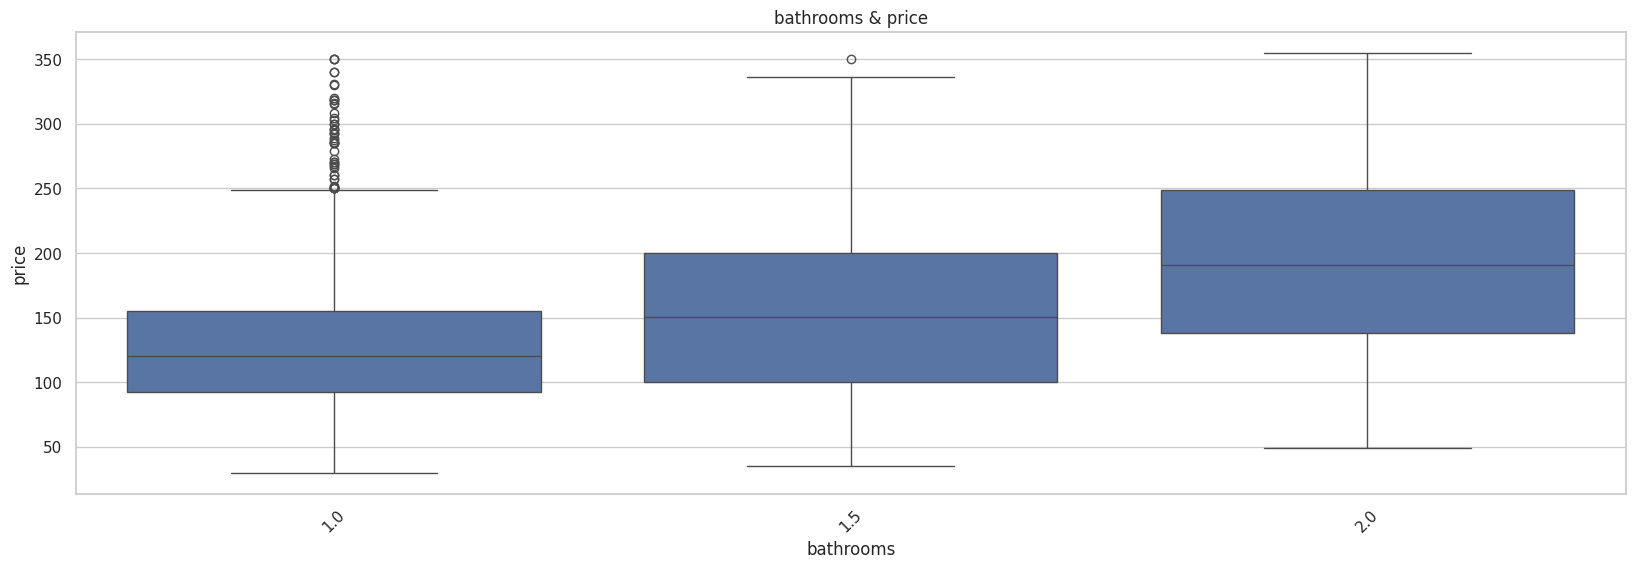

In [268]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='bathrooms', y='price')
plt.title('bathrooms & price')
plt.xticks(rotation=45)
plt.show()